# Neural Networks for 3D Breast Cancer Detection

Authors:
- Olmo Ceriotti 2193258
- Federico Gerardi 1982783
- Cristian Apostol 2002291



## Project Aim

### Main Objective
This project aims to develop, implement, and rigorously evaluate a series of deep learning pipelines for the detection of breast cancer in Digital Breast Tomosynthesis (DBT) scans. The core of the project involves comparing a modern Vision Transformer (ViT) architecture, specifically the Swin Transformer, against a traditional Convolutional Neural Network (CNN) baseline (ResNet-101). For the extended task, the project will further innovate by exploring the application of Parameterized Hypercomplex Neural Networks (PHNNs) to this 3D medical imaging challenge, with the goal of more effectively modeling **inter-view correlations** at each slice depth.


### Core Objectives

1.  **Implement a CNN Baseline:** Develop a `ResNet3DClassifier` pipeline that uses a pretrained **ResNet-101** model as a feature extractor for individual 2D slices of a DBT scan. A Transformer Encoder will be used as an aggregation module to process the sequence of slice features and produce a final classification for the entire 3D volume.

2. **Implement a Vision Transformer Pipeline:** Create a `Swin3DClassifier` based on the **Swin Transformer**, as investigated in the reference paper by Kassis et al.[3]. This model is expected to better capture both local and global spatial information from the DBT slices. We will also implement a variant, `Swin3DClassifierWithAttention`, to explicitly weigth the importance of different slices.

3.  **Evaluation on Public Data:** All models will be trained and evaluated on the publicly available **Breast Cancer Screening-DBT (BCS-DBT)** dataset from The Cancer Imaging Archive (TCIA), ensuring reproducibility.


### Extended Objective

1.  **Investigate Hypercomplex Neural Networks**: Extend the project by designing and implementing a novel **`HypercomplexDBTClassifier`**. This model will leverage the principles of Parameterized Hypercomplex Neural Networks (PHNNs) to enhance the analysis of full, 4-view DBT exams.

2.  **Model Inter-View Correlations at the Slice Level**: The core innovation is to treat the feature vectors from the `n=4` different anatomical views as the components of a single hypercomplex entity. This is achieved by processing these view-groups with a **Parameterized Hypercomplex Multiplication (PHM)** block, creating a fused representation for each slice that integrates cross-view information.

3.  **Leverage Inductive Biases**: The primary motivation for this extension is to exploit the **inductive biases** inherent to hypercomplex algebras. Specifically, we aim to leverage the *dimensionality bias* to compactly represent multiple **views** and the *algebraic bias* to model their interactions in a structured manner, capturing correlations that standard fusion methods might miss.

4.  **Comprehensive Evaluation**: The performance and parameter efficiency of the `HypercomplexDBTClassifier` will be benchmarked against the Swin Transformer and ResNet-101 models. We hypothesize that this hierarchical, hypercomplex approach may offer superior performance by better modeling the complex interplay between anatomical views.

### Methodological Considerations

* **Dataset:** It is crucial to note that the reference study by Kassis et al. [3] used a private, in-house dataset from the Soroka University Medical Center. Our project utilizes the public TCIA BCS-DBT dataset. Therefore, the objective is not to replicate the exact AUC of **0.934** but to **reproduce the general finding** that Swin Transformers are more effective than CNNs for this classification task.

* **Image Resolution:** Due to the large size of the public dataset and our computational constraints, all models will be trained and evaluated on images preprocessed to a **224x224 resolution**. This differs from the optimal 384x384 resolution identified in the reference paper. While this may influence the absolute performance, it provides a consistent and fair basis for comparison across all our implemented architectures.

* **Aggregation:** Our approach replicates the use of architectures like ResNet and Swin Transformer for the analysis of individual 2D slices. However, for the aggregation of multiple slices in a 3D context, we diverge from the simple moving average filter used in the reference paper. We instead implement a Transformer Encoder to create a more powerful, end-to-end model capable of dynamically learning the complex dependencies between the slices of the entire scan.

## Selected Papers and Methodologies

To achieve the project's objectives, the implementation and analysis will be guided by several key architectural concepts and research papers. These sources provide the foundation for the baseline model, advanced fusion techniques, and strategies for handling data imbalance.

#### Baseline Transformer Architecture: SwinT3D Classifier
The primary architecture for this project is a **hybrid 3D Transformer** designed for volumetric data. This model first employs a pre-trained 2D **Swin Transformer** as a feature extractor, applying it to each slice of the DBT volume individually to generate a sequence of feature vectors. To aggregate these features and capture the 3D context, a standard **Transformer Encoder** is used. This encoder processes the entire sequence of slice features, using self-attention to model inter-slice relationships before a final classification layer produces the diagnosis. This architecture directly fulfills the core objective of implementing a Transformer-based pipeline for DBT analysis.

### Architecture: HypercomplexDBTClassifier
To explore an advanced multi-view fusion technique, our `HypercomplexDBTClassifier` architecture draws inspiration from the methodologies presented in *"Multi-View Hypercomplex Learning for Breast Cancer Screening"* and *"Demystifying the Hypercomplex"*. It implements a sophisticated "slice-wise" fusion pipeline that integrates information from four anatomical views (RCC, RMLO, LCC, and LMLO) at each slice depth using hypercomplex algebra, before performing a final temporal analysis.

The data flows through four primary stages:

1.  **Per-Slice Feature Extraction**: The `feature_extractor`, a pre-trained **Swin Transformer** backbone, is applied to every 2D slice from all four views. This initial stage generates a rich feature vector for each individual slice of the exam.
2.  **Hypercomplex Slice-Wise Fusion**: For each slice index, the corresponding feature vectors from the four views are grouped, flattened, and processed by the **`PHMBlock`**. This block uses learned hypercomplex algebra to fuse the cross-view information, producing a new sequence where each vector represents a single slice containing integrated information from all four anatomical perspectives.
3.  **Temporal Aggregation**: This sequence of fused slices is passed to a **`TransformerEncoder`** (`temporal_encoder`) to model the relationships along the depth axis.
4.  **Final Classification**: The resulting contextualized embeddings are then averaged (**mean pooling**) to create a single patient-level vector, which is fed to the final **`classification_head`** for the diagnosis.

### Addressing Data Imbalance: Principles from SIFT-DBT
A significant challenge in DBT analysis is the **extreme data imbalance** found in clinical datasets, where standard supervised training can fail. The **SIFT-DBT** paper ("Self-supervised Initialization and Fine-tuning for Imbalanced Digital Breast Tomosynthesis Image Classification") offers a powerful reference for addressing this issue through two core principles that have inspired our methodology:

1. **The Importance of In-Domain Pre-training**: The paper highlights the critical advantage of a **self-supervised pre-training** phase on DBT data. This approach learns robust anatomical features without relying on rare diagnostic labels, providing a much stronger model initialization for downstream tasks than standard ImageNet weights.

2. **Advanced Fine-tuning Techniques**: The paper also employs sophisticated **fine-tuning strategies**, such as **discriminative learning rates**, to effectively adapt these powerful pre-trained models to the final, imbalanced classification task.

While our project focuses on a different architectural solution (**multi-view hypercomplex fusion**), it adopts these core principles inspired by SIFT-DBT: we initialize our models with robust, DBT-specific pre-trained weights and employ advanced fine-tuning strategies to effectively navigate the challenge of data imbalance.

#### Model Interpretability: Grad-CAM
For model interpretability and to visualize the decision-making process, this project will use the technique described in **"Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization"**. Grad-CAM is a post-hoc explainability method that produces visual heatmaps, highlighting the most important regions in an input image for a given classification decision. This will be crucial for clinically validating that the model is focusing on relevant pathological areas and for visually comparing the reasoning process of different architectures.

## Theoretical Background

This project combines advanced medical imaging techniques with state-of-the-art deep learning architectures. The following sections outline the key concepts, from the clinical imaging data to the specific models used for analysis.

### From 2D Limitations to 3D Volumetric Imaging

The standard for breast cancer screening has long been **2D digital mammography**. Its primary drawback is **tissue superposition**, where overlapping structures can hide malignant lesions or create misleading shadows that mimic them. To address this, **Digital Breast Tomosynthesis (DBT)** was developed. DBT acquires multiple low-dose images, or **projections**, from various angles as an X-ray source moves in an arc.

These projections undergo a process of **tomographic reconstruction** to generate a series of high-resolution **"slices."** Together, these slices form a **3D volumetric dataset**. The fundamental unit of this volume is the **voxel** (volumetric pixel), a small cube of tissue with an associated intensity value. This data is characterized by a **high bit depth** (typically 12 or 16-bit), providing a wide dynamic range of gray values crucial for distinguishing subtle tissue variations. This project leverages the rich, detailed information contained within these DBT volumes.

***

### The Swin Transformer: A Modern Approach for Visual Analysis

While **Convolutional Neural Networks (CNNs)** have been the traditional choice for image analysis, this project employs a more modern architecture: the **Swin Transformer**. As an evolution of the **Vision Transformer (ViT)**, it adapts the powerful Transformer models from natural language processing to the visual domain.

The Swin Transformer is exceptionally well-suited for medical imaging for two main reasons:
> 1. It builds **hierarchical feature maps**, similar to a CNN, allowing it to capture both fine-grained details and broader contextual information within an image.
>
> 2. Its use of a **windowed self-attention** mechanism makes it computationally efficient and scalable, even with high-resolution DBT slices.
>
This architecture is ideal for extracting powerful and relevant features from the volumetric data.

***

### Hypercomplex Neural Networks: Modeling Inter-View Correlations

While a standard deep learning model might process four DBT views independently or fuse them via simple concatenation, this project explores a more advanced approach using **Hypercomplex Neural Networks (HNNs)**.

The fundamental idea is to treat the feature vectors from the **four different anatomical views** (at the same slice depth) not as separate inputs, but as the **components of a single hypercomplex number**. This approach is founded on two powerful **inductive biases** specifically suited for multi-view analysis:

* **Dimensionality Bias**: The model is structurally forced to consider the four views as a single, cohesive entity for each slice. This compels the model to learn the deep, latent relationships between the different anatomical perspectives (e.g., how a feature in the CC view corresponds to a feature in the MLO view).

* **Algebraic Bias**: The internal operations of the `PHMBlock` are governed by learned algebraic rules. When processing the four view embeddings, this not only models their interactions in a structured manner but also imposes drastic **parameter sharing**. This makes the multi-view fusion highly efficient and less prone to overfitting compared to standard methods.

Specifically, this work employs **Parameterized Hypercomplex Neural Networks (PHNNs)**, which are capable of **learning the optimal algebraic rules** directly from the data. The `HypercomplexDBTClassifier` architecture used in this project embodies these principles, using a `PHMBlock` to fuse the four view embeddings at each slice index before performing a final temporal aggregation.

***

### Advanced Fine-Tuning Strategy Inspired by SIFT-DBT

A significant challenge in developing deep learning models for DBT is the **extreme data imbalance** inherent in clinical datasets. Standard supervised training often fails in these scenarios. To address this, we have implemented an advanced **fine-tuning strategy** that is inspired by the principles presented in the SIFT-DBT framework, particularly regarding model initialization and optimization for imbalanced data.

Our approach integrates three key components:

1.  **DBT-Pretrained Initialization**
    Following the core principle of SIFT-DBT, our model is not initialized with standard ImageNet weights. Instead, the backbone is initialized with weights from a model previously **pre-trained on DBT data using a self-supervised strategy**. The SIFT-DBT paper demonstrates that this in-domain pre-training forces the model to learn robust anatomical features before seeing any labels, providing a much stronger starting point for the final classification task.

2.  **Discriminative Learning Rates**
    To preserve the powerful, general features learned during pre-training, we adopt the fine-tuning technique of **discriminative learning rates**, also used in the SIFT-DBT methodology. The backbone is divided into multiple stages, and each stage is updated with a progressively larger learning rate. Earlier layers (capturing basic features) are fine-tuned gently with a small learning rate, while deeper, more task-specific layers are updated more aggressively.

3.  **F1-Optimized Fine-Tuning**
    Given the class imbalance, accuracy is a misleading metric. Therefore, our training loop is optimized to find the best model based on the **F1-score** on the validation set. During each validation epoch, we calculate the optimal decision threshold that maximizes the F1-score. This ensures that the final model is selected based on its ability to balance precision and recall, which is crucial for a clinically useful diagnostic tool.

***

### Alternative Approaches: Anomaly Detection

An alternative approach to supervised classification is **Anomaly Detection**. Unlike classification, which learns to distinguish between a finite number of known classes (e.g., "benign," "malignant"), anomaly detection adopts a different strategy: it learns a robust model of what constitutes **"normality."** Any data that deviates significantly from this model is flagged as an anomaly.

The main techniques include:
* **Reconstruction-based methods**: A model, such as an Autoencoder, is trained to accurately reconstruct only "healthy" exams. When the model is given an exam with a lesion, the reconstruction error will be notably higher, thereby signaling an anomaly.
* **Statistical/Distributional methods**: This involves modeling the statistical distribution of features extracted from a large dataset of normal exams. A new exam whose features fall into a low-probability region of this distribution is considered an anomaly.

In the context of breast cancer screening, anomaly detection could be used as a powerful **triage** tool. Instead of classifying the type of lesion, the system could simply highlight "suspicious" or "unusual" exams that require a priority review by a radiologist. The main challenge of this approach lies in the high variability of healthy breast tissue, which makes it complex to define a universal model of "normality."

***

### Model Interpretability

#### Visualizing Decisions with Grad-CAM


In critical domains like medical diagnostics, a model's mere prediction ("malignant" or "benign") is insufficient. It is essential to understand *why* the model reached a particular conclusion. This field of study is known as **Explainable AI (XAI)**.


To achieve this, we will use a technique called **Grad-CAM (Gradient-weighted Class Activation Mapping)**. Grad-CAM produces a visual heatmap that overlays the input image, highlighting the regions that were most influential in the network's final decision for a specific class. The mechanism is based on analyzing the gradients of the target output class as they flow back to the final convolutional layers. Areas with a higher gradient are those that most strongly activated the neurons responsible for the final classification.

## Implementation



### Import

In [ ]:
from nbiatoolkit import NBIAClient

import os
import glob
import random
import pickle
import multiprocessing

import numpy as np
import pandas as pd
import cv2
from PIL import Image
import pydicom
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import CosineAnnealingLR

import timm

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_recall_curve, roc_auc_score
)

### Configuration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

### Parameters

In [ ]:
DRIVE_BASE_DIR = "/content/drive/MyDrive/NN"

os.makedirs(DRIVE_BASE_DIR, exist_ok=True)

DATASET_DIR = os.path.join(DRIVE_BASE_DIR, "Breast-Cancer-Screening-DBT")
COMPRESSED_DATASET_DIR = os.path.join(DRIVE_BASE_DIR, "Breast-Cancer-Screening-DBT-Compressed")
LABELS_CSV_PATH = os.path.join(DRIVE_BASE_DIR, "labels.csv")
TRAIN_PKL_PATH = os.path.join(DRIVE_BASE_DIR, "data/train_dataset_grayscale.pkl")
VAL_PKL_PATH = os.path.join(DRIVE_BASE_DIR, "data/val_dataset_grayscale.pkl")
TEST_PKL_PATH = os.path.join(DRIVE_BASE_DIR, "data/test_dataset_grayscale.pkl")
BEST_MODEL_PATH = os.path.join(DRIVE_BASE_DIR, 'best_model.pth')

TARGET_SIZE = (224, 224)
MAX_SLICES_PER_VOLUME = 64
LOAD_FROM_PKL = True

MODEL_NAME = 'swin_tiny_patch4_window7_224'
NUM_CLASSES = 2
EPOCHS = 25
BATCH_SIZE = 1

LEARNING_RATE = 1e-5
WEIGHT_DECAY = 5e-4
FOCAL_LOSS_GAMMA = 3

SLICE_TRIM_PERCENTAGE = 0.10
CROP_PADDING = 32
THRESHOLD_VALUE = 300

USE_GROUPED_DATASET = True

In [ ]:
PERFORM_PRETRAINING = True

PRETRAINED_MODEL_PATH = os.path.join(DRIVE_BASE_DIR, 'sift_dbt_pretrained_swin.pth')

PRETRAIN_EPOCHS = 100
PRETRAIN_BATCH_SIZE = 128
PRETRAIN_LR = 1.5e-2
PRETRAIN_MODEL_NAME = 'swin_tiny_patch4_window7_224'

MOCO_DIM = 768
MOCO_QUEUE_LEN = 4096
MOCO_MOMENTUM = 0.999
MOCO_TEMPERATURE = 0.07

NEIGHBORING_SLICE_RANGE = 9


### Dataset

We are going to use the [Breast-Cancer-Screening-DBT](https://www.cancerimagingarchive.net/collection/breast-cancer-screening-dbt/) dataset by the National Cancer Institute

#### Download the dataset

⚠️ The dataset is very big!

In [ ]:
collection_name = "Breast-Cancer-Screening-DBT"
download_dir = "./" + collection_name

os.makedirs(download_dir, exist_ok=True)

with NBIAClient() as client:
    print(f"Querying for series in collection: {collection_name}")
    try:
        series_data = client.getSeries(Collection=collection_name)
        if not series_data:
            print(f"No series found for collection: {collection_name}")
        else:
            print(f"Found {len(series_data)} series. Starting download...")
            series_uids = [s['SeriesInstanceUID'] for s in series_data]
            client.downloadSeries(series_uids, download_dir=download_dir)
            print("Download complete.")
            
    except Exception as e:
        print(f"An error occurred: {e}")

#### Dataset Compression

Given the dataset's substantial size of approximately 1.6 TB, it is impractical to train a model with our current computational resources. Therefore, we need to compress the data. Our compression pipeline consists of the following steps:

1. **Data Selection**: We have downloaded only 50% of the dataset to reduce the initial data volume.
2. **Slice Selection Strategy**: To focus the analysis on the most diagnostically relevant data, a central subset of slices is selected from each 3D scan. This is accomplished by trimming a fixed percentage of the initial and final slices, as these peripheral views often contain more reconstruction artifacts and less complete anatomical information, allowing the model to train on the most valuable portion of the breast tissue.
3. **Slice Dimensionality Reduction**: We reduce the dimensions of each slice in accordance with the requirements of Swin Transformers.

In [ ]:
def normalize_zscore_and_convert(img_array: np.ndarray) -> np.ndarray:
    img_float = img_array.astype(np.float32)
    
    mean = np.mean(img_float)
    std = np.std(img_float)
    
    if std > 0:
        normalized_array = (img_float - mean) / std
    else:
        normalized_array = img_float - mean

    norm_min = -3.0
    norm_max = 3.0
    clipped_norm = np.clip(normalized_array, norm_min, norm_max)
    
    scaled_array = (clipped_norm - norm_min) / (norm_max - norm_min)
    
    img_8bit = (scaled_array * 255).astype(np.uint8)
    
    return img_8bit

In [ ]:
print("Starting data compression pipeline...")
print(f"Source Directory: {DATASET_DIR}")
print(f"Output Directory: {COMPRESSED_DATASET_DIR}")
print("-" * 30)

os.makedirs(COMPRESSED_DATASET_DIR, exist_ok=True)

all_dcm_files = glob.glob(os.path.join(DATASET_DIR, "**", "*.dcm"), recursive=True)
series_dirs = sorted(list(set(os.path.dirname(p) for p in all_dcm_files)))

print(f"Found {len(series_dirs)} DICOM series to process.")

for series_path in tqdm(series_dirs, desc="Processing Series"):
    try:
        dcm_files_in_dir = [f for f in os.listdir(series_path) if f.endswith('.dcm')]
        if not dcm_files_in_dir:
            continue
        
        dcm_volume_file = pydicom.dcmread(os.path.join(series_path, dcm_files_in_dir[0]))
        pixel_volume = dcm_volume_file.pixel_array
        
        num_slices = pixel_volume.shape[0]

        max_projection_slice = np.max(pixel_volume, axis=0)

        mask = max_projection_slice > 300 
        if not np.any(mask): 
            print(f"Skipping series {os.path.basename(series_path)}: no tissue found above threshold.")
            continue

        labels = label(mask.astype(np.uint8))
        props_list = regionprops(labels)
        
        if not props_list:
            print(f"Skipping series {os.path.basename(series_path)}: no regions found.")
            continue
            
        largest_region = max(props_list, key=lambda r: r.area)
        minr, minc, maxr, maxc = largest_region.bbox

        minr = max(0, minr - CROP_PADDING)
        minc = max(0, minc - CROP_PADDING)
        maxr = min(pixel_volume.shape[1], maxr + CROP_PADDING)
        maxc = min(pixel_volume.shape[2], maxc + CROP_PADDING)

        slices_to_trim = int(num_slices * SLICE_TRIM_PERCENTAGE)
        start_index = slices_to_trim
        end_index = num_slices - slices_to_trim

        if start_index >= end_index:
            filtered_pixel_volume = pixel_volume[num_slices // 2 : num_slices // 2 + 1]
        else:
            filtered_pixel_volume = pixel_volume[start_index:end_index]

        relative_path = os.path.relpath(series_path, DATASET_DIR)
        series_output_path = os.path.join(COMPRESSED_DATASET_DIR, relative_path)
        os.makedirs(series_output_path, exist_ok=True)
        
        for i, slice_2d_array in enumerate(filtered_pixel_volume):

            cropped_slice = slice_2d_array[minr:maxr, minc:maxc]
            
            if cropped_slice.size == 0: continue

            resized_slice = cv2.resize(cropped_slice, TARGET_SIZE, interpolation=cv2.INTER_LANCZOS4)
            
            normalized_8bit_slice = normalize_zscore_and_convert(resized_slice)
            
            final_image = Image.fromarray(normalized_8bit_slice)
            output_filename = f"slice_{i:04d}.png"
            final_image.save(os.path.join(series_output_path, output_filename))

    except Exception as e:
        print(f"\nSkipping folder {os.path.basename(series_path)} due to error: {e}")

print("Pipeline completed successfully.")

#### Dataset Classes

##### Single View

The `BreastCancer3DDataset` class is a custom PyTorch Dataset implementation designed to handle single-view 3D breast cancer scans. For each patient, it loads multiple 2D slice images from their directory, applies optional transformations, and stacks them into a 3D volume tensor. Each volume represents a single imaging view and is paired with its corresponding label for training. The class supports random access to patient data and integrates seamlessly with PyTorch's DataLoader for efficient batch processing.

In [ ]:
class BreastCancer3DDataset(Dataset):
    def __init__(self, patient_dirs=None, labels=None, transform=None, load_from_pkl_path=None, preloaded_data=None):
        self.transform = transform
        self.volumes = []
        self.labels = []
        self.patient_ids = []
        self.subfolder_ids = []

        if preloaded_data:
            print("Loading dataset from preloaded data...")
            self.volumes, self.labels, self.patient_ids, self.subfolder_ids = preloaded_data
            print(f"Loaded {len(self.volumes)} volumes from {len(set(self.patient_ids))} unique patients.")
            return

        if load_from_pkl_path and os.path.exists(load_from_pkl_path):
          print(f"Loading dataset from {load_from_pkl_path}...")
          with open(load_from_pkl_path, 'rb') as f:
              data = pickle.load(f)
              if len(data) == 4:
                  self.volumes, self.labels, self.patient_ids, self.subfolder_ids = data
              else:
                  self.volumes, self.labels = data
                  self.patient_ids = [f"patient_{i}" for i in range(len(self.labels))]
                  self.subfolder_ids = [f"subfolder_{i}" for i in range(len(self.labels))]

          print("Dataset loaded successfully from pkl file.")

          self.labels = [
              torch.tensor(0 if (l.item() if isinstance(l, torch.Tensor) else l) == 0 else 1, dtype=torch.long)
              for l in self.labels
          ]
        elif patient_dirs is not None and labels is not None:
            print("Loading and preprocessing data into memory (as grayscale)...")
            for idx, patient_dir in enumerate(tqdm(patient_dirs, desc="Loading data")):
                label = labels[idx]
                patient_id = os.path.basename(patient_dir)

                subfolders = [d for d in os.listdir(patient_dir) if os.path.isdir(os.path.join(patient_dir, d))]
                if not subfolders: continue
                subfolder_path = os.path.join(patient_dir, subfolders[0])

                imaging_folders = [d for d in os.listdir(subfolder_path) if os.path.isdir(os.path.join(subfolder_path, d))]
                if not imaging_folders: continue

                for imaging_folder in imaging_folders:
                    imaging_folder_path = os.path.join(subfolder_path, imaging_folder)
                    slice_paths = sorted(glob.glob(os.path.join(imaging_folder_path, "*.png")))
                    if not slice_paths: continue

                    if len(slice_paths) > MAX_SLICES_PER_VOLUME:
                        step = len(slice_paths) // MAX_SLICES_PER_VOLUME
                        slice_paths = slice_paths[::step][:MAX_SLICES_PER_VOLUME]

                    slices = []
                    for slice_path in slice_paths:
                        try:
                            slice_img = Image.open(slice_path).convert("L")
                            if self.transform:
                                slice_img = self.transform(slice_img)
                            slices.append(slice_img)
                        except Exception as e:
                            print(f"Warning: Could not load {slice_path}: {e}")
                    
                    if not slices: continue

                    self.volumes.append(torch.stack(slices, dim=0))
                    self.labels.append(torch.tensor(label, dtype=torch.long))
                    self.patient_ids.append(patient_id)
                    self.subfolder_ids.append(imaging_folder)

            if NUM_CLASSES == 2:
                print("Applying binary label remapping: {0 -> 0, 1/2/3 -> 1}")
                self.labels = [
                    torch.tensor(0 if (lbl.item() if isinstance(lbl, torch.Tensor) else lbl) == 0 else 1, dtype=torch.long)
                    for lbl in self.labels
                ]
            print(f"Loaded {len(self.volumes)} volumes from {len(set(self.patient_ids))} unique patients")
        else:
            raise ValueError("Either provide (patient_dirs, labels), a valid load_from_pkl_path, or preloaded_data.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.volumes[idx], self.labels[idx]

    def get_patient_id(self, idx):
        return self.patient_ids[idx]

    def get_subfolder_id(self, idx):
        return self.subfolder_ids[idx]
    
    def get_all_data(self):
        return self.volumes, self.labels, self.patient_ids, self.subfolder_ids

    def save_as_pkl(self, file_path):
        print(f"Saving dataset to {file_path}...")
        with open(file_path, 'wb') as f:
            pickle.dump((self.volumes, self.labels, self.patient_ids, self.subfolder_ids), f)
        print("Dataset saved successfully.")

##### Multiple Views

The `BreastCancerPatientGroupedDataset` class is a wrapper that groups volumes by patient ID, specifically designed for multi-view analysis with patients having exactly 4 subfolders (imaging sequences). It builds upon the base `BreastCancer3DDataset` by organizing multiple volumes per patient into patient-level groups. When accessed, it returns all 4 volumes (views) for a given patient along with the patient's label and ID. This grouped approach enables multi-view patient-level analysis and ensures consistent batching where each batch item represents a complete patient case with multiple imaging views rather than individual imaging sequences. Patients with fewer or more than 4 subfolders are filtered out during initialization to maintain data consistency.

In [ ]:
class BreastCancerPatientGroupedDataset(Dataset):
    def __init__(self, base_dataset):
        self.base_dataset = base_dataset
        self.patient_groups = {}
        self.patient_list = sorted(list(set(base_dataset.patient_ids)))

        for idx, patient_id in enumerate(base_dataset.patient_ids):
            if patient_id not in self.patient_groups:
                self.patient_groups[patient_id] = []
            self.patient_groups[patient_id].append(idx)

        valid_patients = []
        for patient_id in self.patient_list:
            if len(self.patient_groups.get(patient_id, [])) == 4:
                valid_patients.append(patient_id)
            else:
                print(f"Warning: Patient {patient_id} has {len(self.patient_groups.get(patient_id, []))} subfolders instead of 4. Skipping.")
        
        self.patient_list = valid_patients
        print(f"Created grouped dataset with {len(self.patient_list)} patients (each with 4 subfolders).")

    def __len__(self):
        return len(self.patient_list)

    def __getitem__(self, idx):
        patient_id = self.patient_list[idx]
        indices = self.patient_groups[patient_id]
        
        volumes = [self.base_dataset[sub_idx][0] for sub_idx in indices]
        patient_label = self.base_dataset[indices[0]][1]

        return volumes, patient_label, patient_id

##### Loading the data

In this section we handle the entire pipeline from raw data preparation to ready-to-use DataLoaders. It begins with custom collate functions that pad variable-length 3D volumes to uniform dimensions and create attention masks for efficient batch processing. The  `collate_fn` handles individual volumes while `collate_fn_grouped` manages patient-grouped datawhere each patient has multiple scan types (4 volumes per patient). The `prepare_data` function processes metadata CSV files to extract multi-class labels (Normal, Actionable, Benign, Cancer) and matches them with corresponding scan directories containing PNG image slices. The pipeline then creates train/validation/test splits with stratification to maintain class distribution 
across splits. Datasets are either loaded from pre-saved pickle files for efficiency or created fresh from source directories with proper transformations (resizing and tensor conversion). The system supports both individual volume processing and patient-grouped processing where all 
4 scan types per patient are batched together. Class imbalance is addressed through WeightedRandomSampler that assigns higher sampling probabilities to underrepresented classes. Finally, DataLoaders are configured with appropriate batch sizes, parallel workers, and memory pinning for optimal training performance. Class weights are calculated for focal loss to further handle imbalanced data during training.

In [ ]:
def collate_fn(batch):
    volumes, labels = zip(*batch)
    max_len = max(v.shape[0] for v in volumes)
    _, c, h, w = volumes[0].shape

    padded_volumes = torch.zeros(len(volumes), max_len, c, h, w)
    masks = torch.ones(len(volumes), max_len, dtype=torch.bool)

    for i, v in enumerate(volumes):
        end = v.shape[0]
        padded_volumes[i, :end] = v
        masks[i, :end] = False

    return padded_volumes, torch.stack(labels), masks


def collate_fn_grouped(batch):
    batch_volumes, batch_labels, patient_ids = zip(*batch)
    
    all_volumes = [vol for patient_vols in batch_volumes for vol in patient_vols]
    
    max_len = max(v.shape[0] for v in all_volumes)
    _, c, h, w = all_volumes[0].shape

    padded_volumes = torch.zeros(len(all_volumes), max_len, c, h, w)
    masks = torch.ones(len(all_volumes), max_len, dtype=torch.bool)

    for i, v in enumerate(all_volumes):
        end = v.shape[0]
        padded_volumes[i, :end] = v
        masks[i, :end] = False

    batch_size = len(batch)
    grouped_volumes = padded_volumes.view(batch_size, 4, max_len, c, h, w)
    grouped_masks = masks.view(batch_size, 4, max_len)
    
    labels_tensor = torch.stack(batch_labels)

    return grouped_volumes, labels_tensor, grouped_masks, patient_ids

def prepare_data(processed_data_dir, metadata_csv_path):
    print("Preparing data paths and labels for multi-class classification...")
    metadata = pd.read_csv(metadata_csv_path)

    study_uid_col = 'StudyUID'
    class_columns = ['Normal', 'Actionable', 'Benign', 'Cancer']
    class_to_label = {label: i for i, label in enumerate(class_columns)}

    metadata['class_name'] = metadata[class_columns].idxmax(axis=1)
    metadata['label'] = metadata['class_name'].map(class_to_label)
    label_map = metadata.groupby(study_uid_col)['label'].max().to_dict()
    print(f"Processed {len(label_map)} unique studies from metadata file.")

    all_paths_and_labels = {}
    skipped_directories = []

    print(f"Scanning data directory: {processed_data_dir}")
    for root, dirs, files in os.walk(processed_data_dir):
        for dir_name in list(dirs):
            for study_uid, label in label_map.items():
                if study_uid in dir_name:
                    study_path = os.path.join(root, dir_name)
                    if study_path in all_paths_and_labels: continue

                    if glob.glob(os.path.join(study_path, "**", "*.png"), recursive=True):
                        all_paths_and_labels[study_path] = label
                    else:
                        skipped_directories.append(study_path)

                    dirs.remove(dir_name)
                    break

    if skipped_directories:
        print(f"Skipped {len(skipped_directories)} directories with no PNG files.")

    if not all_paths_and_labels:
        print("\n--- WARNING: No matching scan directories were found! ---")

    final_dirs = list(all_paths_and_labels.keys())
    final_labels = list(all_paths_and_labels.values())

    print(f"Found {len(final_dirs)} valid study directories with corresponding labels.")
    return final_dirs, final_labels

In [ ]:
transform = transforms.Compose([
    transforms.Resize(TARGET_SIZE),
    transforms.ToTensor(),
])

if os.path.exists(TRAIN_PKL_PATH) and os.path.exists(VAL_PKL_PATH) and os.path.exists(TEST_PKL_PATH):
    print("Loading datasets from existing pkl files...")
    train_dataset_base = BreastCancer3DDataset(load_from_pkl_path=TRAIN_PKL_PATH, transform=transform)
    val_dataset_base = BreastCancer3DDataset(load_from_pkl_path=VAL_PKL_PATH, transform=transform)

else:
    print("Creating new datasets from source...")
    labels_df = pd.read_csv(LABELS_CSV_PATH)
    all_patient_dirs = [os.path.join(COMPRESSED_DATASET_DIR, pid) for pid in labels_df['PatientID'].astype(str)]
    all_labels = labels_df['Ground Truth'].values

    patient_id_to_label = {os.path.basename(pdir): lbl for pdir, lbl in zip(all_patient_dirs, all_labels)}
    unique_patient_ids = sorted(list(patient_id_to_label.keys()))
    unique_labels = [patient_id_to_label[pid] for pid in unique_patient_ids]

    train_pids, test_pids, train_labels, test_labels = train_test_split(
        unique_patient_ids, unique_labels, test_size=0.2, random_state=42, stratify=unique_labels)
    
    train_pids, val_pids, train_labels, val_labels = train_test_split(
        train_pids, train_labels, test_size=0.25, random_state=42, stratify=train_labels)

    print(f"Patient splits: Train={len(train_pids)}, Val={len(val_pids)}, Test={len(test_pids)}")

    train_dirs = [os.path.join(COMPRESSED_DATASET_DIR, pid) for pid in train_pids]
    val_dirs = [os.path.join(COMPRESSED_DATASET_DIR, pid) for pid in val_pids]

    train_dataset_base = BreastCancer3DDataset(patient_dirs=train_dirs, labels=train_labels, transform=transform)
    val_dataset_base = BreastCancer3DDataset(patient_dirs=val_dirs, labels=val_labels, transform=transform)

    train_dataset_base.save_as_pkl(TRAIN_PKL_PATH)
    val_dataset_base.save_as_pkl(VAL_PKL_PATH)

In [ ]:
if USE_GROUPED_DATASET:
    print("\nUsing Patient-Grouped Dataset...")
    train_dataset = BreastCancerPatientGroupedDataset(train_dataset_base)
    val_dataset = BreastCancerPatientGroupedDataset(val_dataset_base)
    collate_function = collate_fn_grouped
else:
    print("\nUsing Individual Subfolder Dataset...")
    train_dataset = train_dataset_base
    val_dataset = val_dataset_base
    collate_function = collate_fn

In [ ]:
print("--- Creating DataLoaders ---")

if isinstance(train_dataset, BreastCancerPatientGroupedDataset):
    train_labels_list = [
        train_dataset.base_dataset.labels[train_dataset.patient_groups[pid][0]].item()
        for pid in train_dataset.patient_list
    ]
else:
    train_labels_list = [label.item() for label in train_dataset.labels]

class_counts = np.bincount(train_labels_list, minlength=NUM_CLASSES)
NUM_WORKERS = min(4, multiprocessing.cpu_count())

if np.any(class_counts == 0):
    print("Warning: A class has 0 samples in the training set. WeightedRandomSampler disabled.")
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=collate_function,
        num_workers=NUM_WORKERS,
        pin_memory=True
    )
else:
    print("Using WeightedRandomSampler to handle class imbalance.")
    class_weights = 1. / (class_counts + 1e-6)
    samples_weights = torch.tensor([class_weights[t] for t in train_labels_list], dtype=torch.double)

    if NUM_CLASSES == 2:
        class_names = ['Normal', 'Abnormal']
    else:
        class_names = ['Normal', 'Actionable', 'Benign', 'Cancer']

    for i, count in enumerate(class_counts):
        
        print(f"Class '{class_names[i]}': {count} samples (Weight: {class_weights[i]:.4f})")

    sampler = WeightedRandomSampler(samples_weights, len(samples_weights))
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        sampler=sampler,
        collate_fn=collate_function,
        num_workers=NUM_WORKERS,
        pin_memory=True
    )
    print(f"loader:{len(train_loader)}")
    print(f"dataset: {len(train_dataset)}")

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_function,
    num_workers=NUM_WORKERS,
    pin_memory=True
)


class_weights = 1. / (class_counts + 1e-6)
class_weights = (class_weights / np.sum(class_weights)) * NUM_CLASSES
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f"Calculated class weights for Focal Loss (alpha): {class_weights}")

print(f"\nDataLoaders created:")
print(f" - Train: {len(train_loader)} batches of size {BATCH_SIZE}")
print(f" - Validation: {len(val_loader)} batches of size {BATCH_SIZE}")

In [ ]:
print("\n--- Creating Test Dataset & Loader ---")

test_dataset_base = BreastCancer3DDataset(
    load_from_pkl_path=TEST_PKL_PATH,
    transform=transform,
)

if isinstance(train_dataset, BreastCancerPatientGroupedDataset):
    print("Using grouped test dataset...")
    test_dataset = BreastCancerPatientGroupedDataset(test_dataset_base)
    collate_function = collate_fn_grouped
else:
    print("Using standard test dataset...")
    test_dataset = test_dataset_base
    collate_function = collate_fn

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=collate_function,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

print(f"Test Loader Ready: {len(test_loader)} batches of size {BATCH_SIZE}")


### Models

#### **ResNet3D Breast Cancer Classifier**

##### **ResNet3D Breast Cancer Classifier Single View**

The ResNet3D Breast Cancer Classifier is a hybrid deep learning architecture that combines a ResNet backbone with a transformer-based aggregation module. It processes DBT volumes through three main stages:

1. **Per-Slice Feature Extraction**: A pre-trained ResNet-101 model, with its classification head removed, analyzes each 2D slice independently. This creates a sequence of rich feature vectors that capture the intricate patterns and structures within each slice.

2. **Sequential Aggregation**: A Transformer Encoder processes the sequence of feature vectors from all slices simultaneously. Through its self-attention mechanism, it models the relationships between slices, effectively capturing the 3D context of the scan. The architecture employs memory-efficient chunking to handle long sequences.

3. **Classification**: The aggregated features are passed through a final linear layer to produce the diagnosis. The model includes a masking mechanism to handle variable-length sequences and padding, ensuring robust performance across different scan sizes.

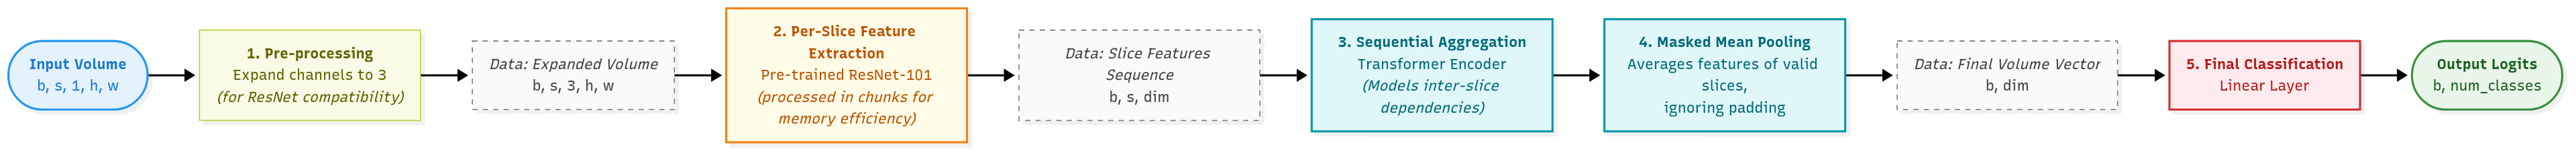

In [ ]:
class ResNet3DClassifier(nn.Module):
    def __init__(self, num_classes, model_name='resnet101', pretrained=True):
        super().__init__()
        self.feature_extractor = timm.create_model(model_name, pretrained=pretrained, num_classes=0)
        feature_dim = self.feature_extractor.num_features

        self.aggregator_layer = nn.TransformerEncoderLayer(
            d_model=feature_dim, nhead=4, dim_feedforward=feature_dim * 2,
            dropout=0.1, activation='relu', batch_first=True
        )
        self.aggregator = nn.TransformerEncoder(self.aggregator_layer, num_layers=1)
        self.classification_head = nn.Linear(feature_dim, num_classes)

    def forward(self, x, masks=None):
        b, s, c, h, w = x.shape

        if c == 1:
            x = x.expand(-1, -1, 3, -1, -1)

        feature_list = []
        chunk_size = min(16, s)
        for i in range(0, s, chunk_size):
            end_idx = min(i + chunk_size, s)
            chunk = x[:, i:end_idx]
            chunk_b, chunk_s, chunk_c, chunk_h, chunk_w = chunk.shape
            chunk = chunk.reshape(chunk_b * chunk_s, chunk_c, chunk_h, chunk_w)
            chunk_features = self.feature_extractor(chunk)
            chunk_features = chunk_features.reshape(chunk_b, chunk_s, -1)
            feature_list.append(chunk_features)

        features = torch.cat(feature_list, dim=1)

        if masks is not None:
            aggregated_features = self.aggregator(features, src_key_padding_mask=masks)
            valid_mask = ~masks.unsqueeze(-1)
            masked_features = aggregated_features * valid_mask
            final_vector = masked_features.sum(dim=1) / (valid_mask.sum(dim=1) + 1e-6)
        else:
            aggregated_features = self.aggregator(features)
            final_vector = aggregated_features.mean(dim=1)

        logits = self.classification_head(final_vector)
        return logits

##### **ResNet3D Breast Cancer Classifier Multiview**

The Multi-View ResNet Classifier extends the base architecture to handle multiple views (e.g., CC and MLO) of the same breast simultaneously. It processes DBT volumes through three hierarchical aggregation stages:

1. **Per-Slice Feature Extraction**: Like the single-view model, a ResNet-101 backbone first processes each 2D slice independently to extract slice-level features.

2. **View-Level Aggregation**: For each view (CC/MLO), a dedicated Transformer Encoder aggregates the slice features into a single view-level representation. This captures the 3D context within each view independently.

3. **Patient-Level Aggregation**: A second Transformer Encoder then processes the view-level representations together, modeling the relationships between different views of the same breast. This creates a final, comprehensive patient-level representation that incorporates information from all available views before classification.

This hierarchical approach allows the model to learn both intra-view (between slices) and inter-view (between CC/MLO) relationships, potentially capturing complementary information from different viewing angles.

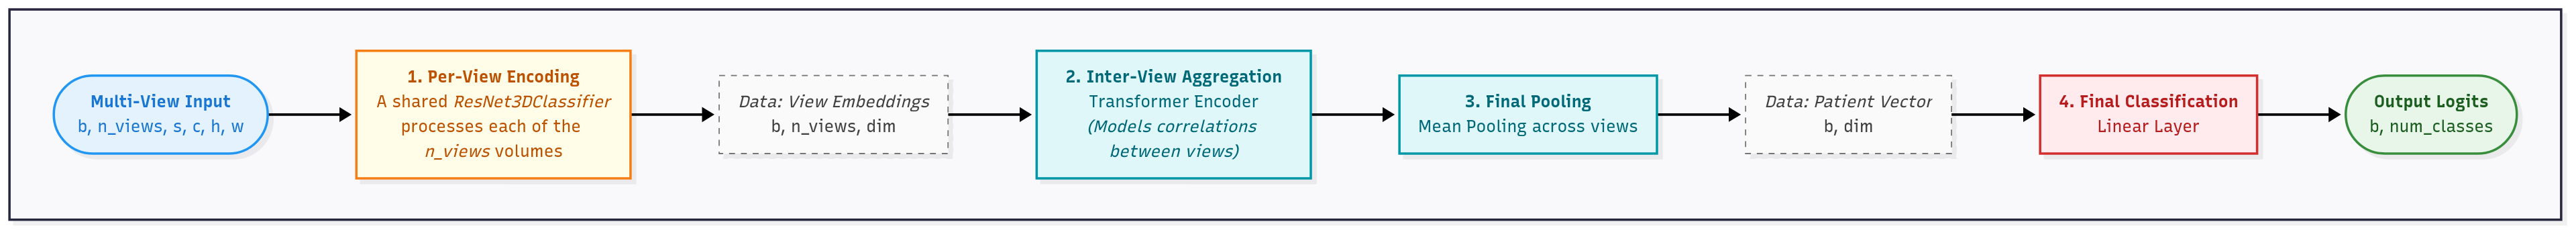

In [ ]:
class MultiViewResNetClassifier(nn.Module):
    def __init__(self, num_classes, model_name='resnet101', pretrained=True):
        super().__init__()
        self.single_view_encoder = ResNet3DClassifier(num_classes, model_name, pretrained)
        feature_dim = self.single_view_encoder.feature_extractor.num_features

        self.view_aggregator_layer = nn.TransformerEncoderLayer(
            d_model=feature_dim, nhead=4, dim_feedforward=feature_dim * 2,
            dropout=0.1, activation='relu', batch_first=True
        )
        self.view_aggregator = nn.TransformerEncoder(self.view_aggregator_layer, num_layers=2)
        self.classification_head = nn.Linear(feature_dim, num_classes)

    def _get_view_embedding(self, x, masks):
        """Extracts a single feature vector from a batch of views."""
        b, s, c, h, w = x.shape
        if c == 1: x = x.expand(-1, -1, 3, -1, -1)

        features = self.single_view_encoder.feature_extractor(x.flatten(0, 1)).view(b, s, -1)
        agg_features = self.single_view_encoder.aggregator(features, src_key_padding_mask=masks)

        if masks is not None:
            valid_mask = ~masks.unsqueeze(-1)
            final_vector = (agg_features * valid_mask).sum(dim=1) / (valid_mask.sum(dim=1) + 1e-6)
        else:
            final_vector = agg_features.mean(dim=1)
        return final_vector

    def forward(self, x, masks):
        b, n_views, s, c, h, w = x.shape
        x_flat = x.view(b * n_views, s, c, h, w)
        masks_flat = masks.view(b * n_views, s)

        view_embeddings_flat = self._get_view_embedding(x_flat, masks_flat)
        view_embeddings = view_embeddings_flat.view(b, n_views, -1)

        patient_embeddings_agg = self.view_aggregator(view_embeddings)
        patient_embedding_final = patient_embeddings_agg.mean(dim=1)
        logits = self.classification_head(patient_embedding_final)
        return logits

#### **SwinT3D Breast Cancer Classifier**

##### **SwinT3D Breast Cancer Classifier Single View**

This architecture, implemented in the `Swin3DClassifier` class, processes a 3D DBT volume in three main stages:

* **1. Per-Slice Feature Extraction**: A pre-trained **Swin Transformer** backbone, with its classification head removed, is applied to each 2D slice of the volume. A **Positional Encoding** is then added to each extracted feature vector to provide the model with awareness of the slice's position.

* **2. Sequential Aggregation**: A **Transformer Encoder** takes the full sequence of position-aware features as input. Using its self-attention mechanism, it models the relationships between slices, producing a sequence of context-aware vectors that incorporate 3D information.

* **3. Classification**: The sequence of context-aware vectors is reduced to a single vector via **mean pooling**. This final vector is then fed into a **fully-connected linear layer** to produce the diagnosis.

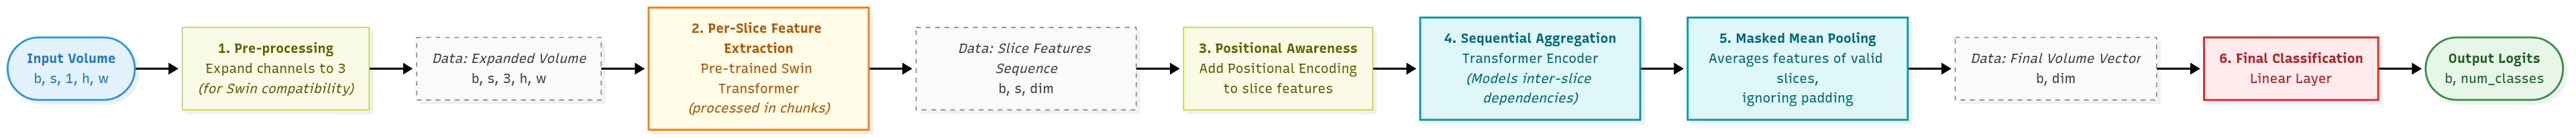

In [ ]:
class Swin3DClassifier(nn.Module):
    def __init__(self, num_classes, model_name='swin_tiny_patch4_window7_224', pretrained=True):
        super().__init__()
        self.feature_extractor = timm.create_model(model_name, pretrained=pretrained, num_classes=0)
        feature_dim = self.feature_extractor.num_features

        self.positional_encoding = nn.Embedding(MAX_SLICES_PER_VOLUME, feature_dim)

        self.aggregator_layer = nn.TransformerEncoderLayer(
            d_model=feature_dim, nhead=4, dim_feedforward=feature_dim * 2,
            dropout=0.1, activation='relu', batch_first=True
        )
        self.aggregator = nn.TransformerEncoder(self.aggregator_layer, num_layers=1)
        self.classification_head = nn.Linear(feature_dim, num_classes)

    def _get_view_embedding(self, x, masks):
      b, s, c, h, w = x.shape
      if c == 1:
          x = x.expand(-1, -1, 3, -1, -1)

      feature_list = []
      chunk_size = min(16, s)
      for i in range(0, s, chunk_size):
          end_idx = min(i + chunk_size, s)
          chunk = x[:, i:end_idx]
          chunk_b, chunk_s, chunk_c, chunk_h, chunk_w = chunk.shape
          chunk = chunk.reshape(chunk_b * chunk_s, chunk_c, chunk_h, chunk_w)
          chunk_features = self.feature_extractor(chunk)
          chunk_features = chunk_features.reshape(chunk_b, chunk_s, -1)
          feature_list.append(chunk_features)

      features = torch.cat(feature_list, dim=1)

      positions = torch.arange(s, device=x.device).expand(b, -1)
      features = features + self.positional_encoding(positions)

      if masks is not None:
          aggregated_features = self.aggregator(features, src_key_padding_mask=masks)
          valid_mask = ~masks.unsqueeze(-1)
          final_vector = (aggregated_features * valid_mask).sum(dim=1) / (valid_mask.sum(dim=1) + 1e-6)
      else:
          aggregated_features = self.aggregator(features)
          final_vector = aggregated_features.mean(dim=1)

      return final_vector


    def forward(self, x, masks=None):
        b, s, c, h, w = x.shape

        if c == 1:
            x = x.expand(-1, -1, 3, -1, -1)

        feature_list = []
        chunk_size = min(16, s)
        for i in range(0, s, chunk_size):
            end_idx = min(i + chunk_size, s)
            chunk = x[:, i:end_idx]
            chunk_b, chunk_s, chunk_c, chunk_h, chunk_w = chunk.shape
            chunk = chunk.reshape(chunk_b * chunk_s, chunk_c, chunk_h, chunk_w)
            chunk_features = self.feature_extractor(chunk)
            chunk_features = chunk_features.reshape(chunk_b, chunk_s, -1)
            feature_list.append(chunk_features)

        features = torch.cat(feature_list, dim=1)

        positions = torch.arange(s, device=x.device).expand(b, -1)
        features = features + self.positional_encoding(positions)

        if masks is not None:
            aggregated_features = self.aggregator(features, src_key_padding_mask=masks)
            valid_mask = ~masks.unsqueeze(-1)
            masked_features = aggregated_features * valid_mask
            final_vector = masked_features.sum(dim=1) / (valid_mask.sum(dim=1) + 1e-6)
        else:
            aggregated_features = self.aggregator(features)
            final_vector = aggregated_features.mean(dim=1)

        logits = self.classification_head(final_vector)
        return logits

##### **SwinT3D Breast Cancer Classifier Multi View**

This architecture extends the single-view Swin Transformer to simultaneously process four views (RCC, RMLO, LCC, LMLO) of a breast exam. The model processes each view through three stages:

1. **Per-View Feature Extraction**: Each view (a 3D volume) is independently processed by a **shared Swin3DClassifier**, which encodes the volumetric information into a single feature vector.

2. **View-Level Aggregation**: A **Transformer Encoder** models the relationships between the four view embeddings through self-attention, generating a set of integrated features.

3. **Patient-Level Classification**: The aggregated features are passed through a final **classification head** to produce a diagnosis that considers all available views simultaneously.

This multi-view approach enables the model to leverage complementary information from different angles, potentially improving diagnostic accuracy over single-view analysis.

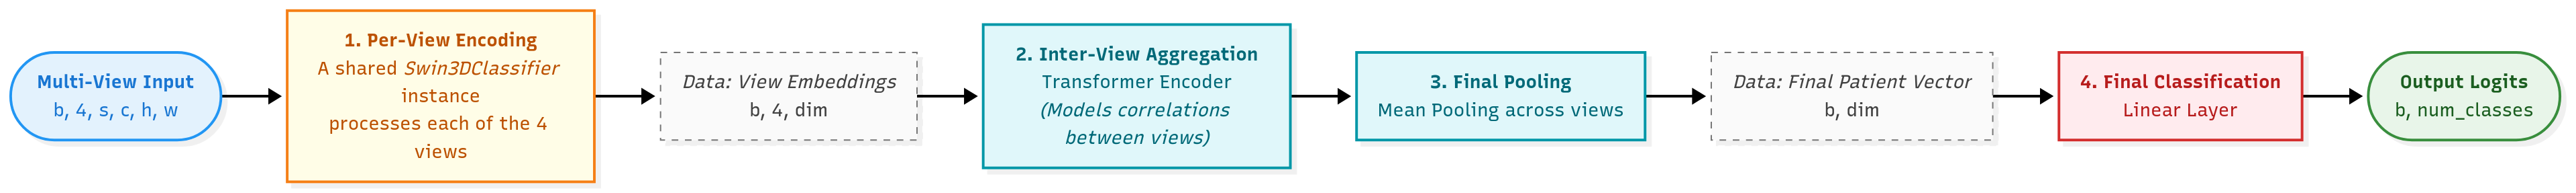

In [ ]:
class MultiViewSwinClassifier(nn.Module):
    def __init__(self, num_classes, model_name='swin_tiny_patch4_window7_224', pretrained=True):
        super().__init__()
        self.single_view_encoder = Swin3DClassifier(num_classes, model_name, pretrained)
        feature_dim = self.single_view_encoder.feature_extractor.num_features

        self.view_aggregator_layer = nn.TransformerEncoderLayer(
            d_model=feature_dim, nhead=4, dim_feedforward=feature_dim * 2,
            dropout=0.1, activation='relu', batch_first=True
        )
        self.view_aggregator = nn.TransformerEncoder(self.view_aggregator_layer, num_layers=2)

        self.classification_head = nn.Linear(feature_dim, num_classes)

    def _get_view_embedding(self, x, masks):
        """Extracts a single feature vector from a batch of views."""
        b, s, c, h, w = x.shape
        if c == 1: x = x.expand(-1, -1, 3, -1, -1)

        features = self.single_view_encoder.feature_extractor(x.flatten(0, 1)).view(b, s, -1)
        positions = torch.arange(s, device=x.device).expand(b, -1)
        features = features + self.single_view_encoder.positional_encoding(positions)

        agg_features = self.single_view_encoder.aggregator(features, src_key_padding_mask=masks)

        if masks is not None:
            valid_mask = ~masks.unsqueeze(-1)
            final_vector = (agg_features * valid_mask).sum(dim=1) / (valid_mask.sum(dim=1) + 1e-6)
        else:
            final_vector = agg_features.mean(dim=1)
        return final_vector

    def forward(self, x, masks):
        b, n_views, s, c, h, w = x.shape
        x_flat = x.view(b * n_views, s, c, h, w)
        masks_flat = masks.view(b * n_views, s)
        view_embeddings_flat = self._get_view_embedding(x_flat, masks_flat)
        view_embeddings = view_embeddings_flat.view(b, n_views, -1)
        patient_embeddings_agg = self.view_aggregator(view_embeddings)
        patient_embedding_final = patient_embeddings_agg.mean(dim=1)
        logits = self.classification_head(patient_embedding_final)
        return logits

##### **Architectural Variant: `Swin3DClassifierWithAttention` single view version**

This variant differs from the base model exclusively in the final pooling stage, using a more targeted aggregation method:

* **3. Classification (with Attention)**: Instead of mean pooling, a learnable **attention module** calculates a weight for each context-aware vector. The final vector is a **weighted sum** based on these weights, allowing the model to focus on the most relevant slices before being passed to the **fully-connected linear layer**.



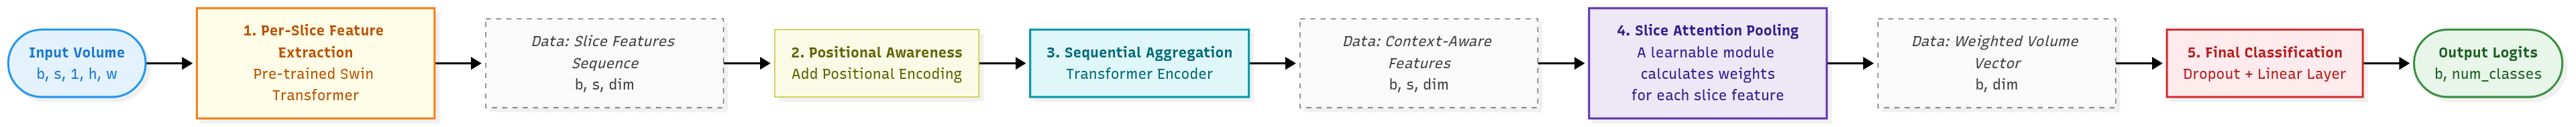

In [ ]:
class Swin3DClassifierWithAttention(nn.Module):
    def __init__(self, num_classes, model_name='swin_tiny_patch4_window7_224', pretrained=True):
        super().__init__()
        self.feature_extractor = timm.create_model(model_name, pretrained=pretrained, num_classes=0)
        feature_dim = self.feature_extractor.num_features

        self.positional_encoding = nn.Embedding(MAX_SLICES_PER_VOLUME, feature_dim)

        self.aggregator_layer = nn.TransformerEncoderLayer(
            d_model=feature_dim, nhead=8, dim_feedforward=feature_dim * 4,
            dropout=0.3, activation='relu', batch_first=True
        )
        self.aggregator = nn.TransformerEncoder(self.aggregator_layer, num_layers=3)

        self.slice_attention = nn.Sequential(
            nn.Linear(feature_dim, feature_dim // 2), nn.ReLU(),
            nn.Dropout(0.3), nn.Linear(feature_dim // 2, 1),
            nn.Softmax(dim=1)
        )

        self.dropout = nn.Dropout(0.5)
        self.classification_head = nn.Linear(feature_dim, num_classes)

    def forward(self, x, masks=None):
        b, s, c, h, w = x.shape

        if c == 1:
            x = x.expand(-1, -1, 3, -1, -1)

        feature_list = []
        chunk_size = min(16, s)
        for i in range(0, s, chunk_size):
            end_idx = min(i + chunk_size, s)
            chunk = x[:, i:end_idx]
            chunk_b, chunk_s, chunk_c, chunk_h, chunk_w = chunk.shape
            chunk = chunk.reshape(chunk_b * chunk_s, chunk_c, chunk_h, chunk_w)
            chunk_features = self.feature_extractor(chunk)
            chunk_features = chunk_features.reshape(chunk_b, chunk_s, -1)
            feature_list.append(chunk_features)

        features = torch.cat(feature_list, dim=1)

        positions = torch.arange(s, device=x.device).expand(b, -1)
        features = features + self.positional_encoding(positions)

        if masks is not None:
            aggregated_features = self.aggregator(features, src_key_padding_mask=masks)
        else:
            aggregated_features = self.aggregator(features)

        attn_weights = self.slice_attention(aggregated_features)
        final_vector = (aggregated_features * attn_weights).sum(dim=1)

        logits = self.classification_head(self.dropout(final_vector))
        return logits

##### **Architectural Variant: `MultiViewSwinClassifierWithAttention`**

Key differences from single-view `Swin3DClassifierWithAttention`:
1. Uses multiple instances of the single-view attention model in parallel
2. Adds a second-level transformer encoder with 4 attention heads (versus 8 in the base model)
3. Processes multiple views simultaneously instead of sequentially

Key differences from standard `MultiViewSwinClassifier`:
1. Adds slice-level attention mechanism within each view
2. Uses attention-weighted pooling instead of mean pooling for slice aggregation
3. More parameter-efficient view-level transformer (4 heads vs 8, smaller feedforward dimension)


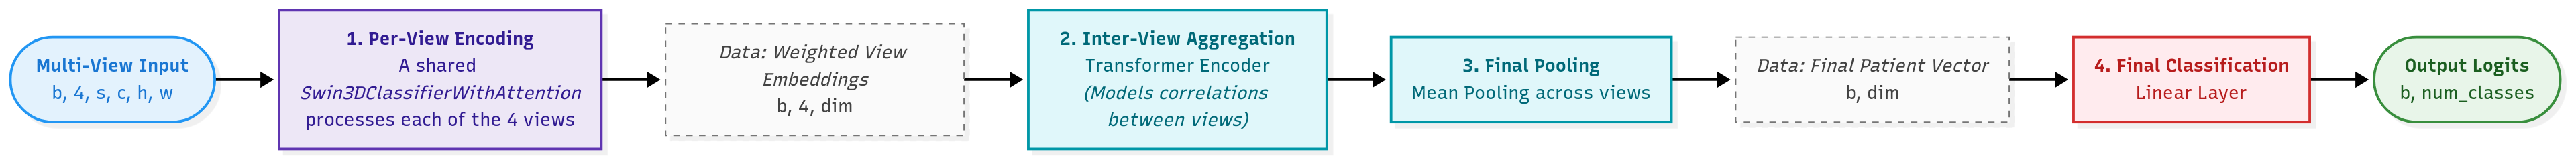

In [ ]:
class MultiViewSwinClassifierWithAttention(nn.Module):
    def __init__(self, num_classes, model_name='swin_tiny_patch4_window7_224', pretrained=True):
        super().__init__()
        self.single_view_encoder = Swin3DClassifierWithAttention(num_classes, model_name, pretrained)
        feature_dim = self.single_view_encoder.feature_extractor.num_features

        self.view_aggregator_layer = nn.TransformerEncoderLayer(
            d_model=feature_dim, nhead=4, dim_feedforward=feature_dim * 2,
            dropout=0.1, activation='relu', batch_first=True
        )
        self.view_aggregator = nn.TransformerEncoder(self.view_aggregator_layer, num_layers=2)
        self.classification_head = nn.Linear(feature_dim, num_classes)

    def _get_view_embedding(self, x, masks):
        b, s, c, h, w = x.shape
        if c == 1: x = x.expand(-1, -1, 3, -1, -1)

        features = self.single_view_encoder.feature_extractor(x.flatten(0, 1)).view(b, s, -1)
        positions = torch.arange(s, device=x.device).expand(b, -1)
        features = features + self.single_view_encoder.positional_encoding(positions)

        agg_features = self.single_view_encoder.aggregator(features, src_key_padding_mask=masks)
        attn_weights = self.single_view_encoder.slice_attention(agg_features)
        final_vector = (agg_features * attn_weights).sum(dim=1)
        return final_vector

    def forward(self, x, masks):
        b, n_views, s, c, h, w = x.shape
        x_flat = x.view(b * n_views, s, c, h, w)
        masks_flat = masks.view(b * n_views, s)

        view_embeddings_flat = self._get_view_embedding(x_flat, masks_flat)
        view_embeddings = view_embeddings_flat.view(b, n_views, -1)

        patient_embeddings_agg = self.view_aggregator(view_embeddings)
        patient_embedding_final = patient_embeddings_agg.mean(dim=1)
        logits = self.classification_head(patient_embedding_final)
        return logits

#### **HypercomplexDBTClassifier: Slice-Wise Multi-View Fusion Architecture**

This architecture implements a sophisticated "slice-wise" fusion pipeline that integrates cross-view information from four anatomical views at each slice depth, before performing a final temporal analysis of the entire volume.

The model's data flow is structured in four main stages:

1.  **Per-Slice Feature Extraction**: A shared **Swin Transformer** backbone (`feature_extractor`) is applied to every 2D slice from all four views. This initial stage generates a rich feature vector for each individual slice of the exam.

2.  **Hypercomplex Slice-Wise Fusion**: For each slice index, the corresponding feature vectors from the four views are grouped, flattened, and processed by a **`PHMBlock`**. This module uses learned hypercomplex algebra to fuse the cross-view information, producing a new sequence where each vector represents a single slice containing integrated information from all four anatomical perspectives.

3.  **Temporal Aggregation**: The sequence of fused slice embeddings is passed to a **`TransformerEncoder`** (`temporal_encoder`). This module models the relationships and dependencies along the depth axis of the breast volume, outputting a sequence of final, context-aware embeddings.

4.  **Final Classification**: The output sequence from the temporal encoder is reduced to a single patient-level vector via mean pooling. This vector is then passed to the final **`classification_head`** for the diagnosis.


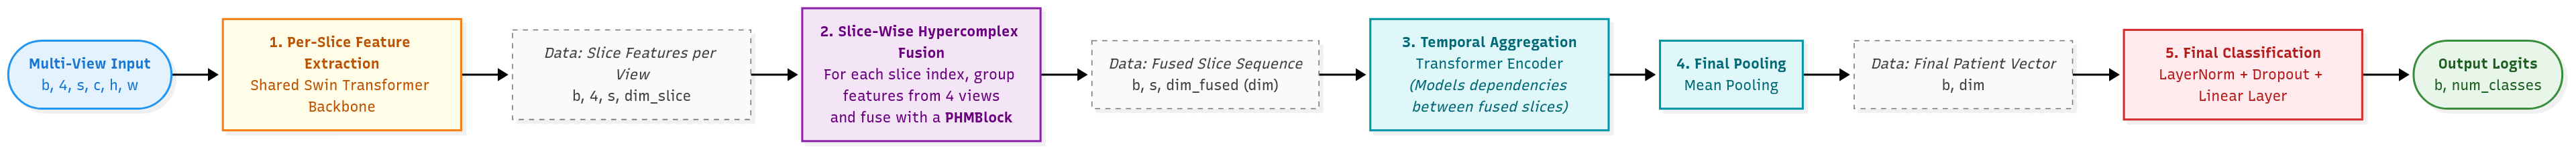

In [ ]:
class PHMBlock(nn.Module):
    def __init__(self, n, dim, hidden_dim, dropout=0.1):
        super().__init__()
        self.phm1 = PHMLinear(n=n, in_features=dim, out_features=hidden_dim)
        self.phm2 = PHMLinear(n=n, in_features=hidden_dim, out_features=dim)
        self.norm1 = nn.LayerNorm(dim)
        self.norm2 = nn.LayerNorm(dim)
        self.dropout = nn.Dropout(dropout)
        self.act = nn.GELU()

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.act(self.phm1(x))
        x = self.dropout(x)
        x = self.phm2(x)
        x = self.dropout(x)
        return self.norm2(x + residual)

class PHMLinear(nn.Module):
    def __init__(self, n, in_features, out_features, bias=True):
        super(PHMLinear, self).__init__()
        self.n = n
        self.in_features, self.out_features = in_features, out_features
        assert in_features % n == 0 and out_features % n == 0
        self.a = nn.Parameter(torch.empty(n, n, n))
        self.s = nn.Parameter(torch.empty(n, out_features // n, in_features // n))
        self.bias = nn.Parameter(torch.empty(out_features)) if bias else None
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.a)
        nn.init.xavier_uniform_(self.s)
        if self.bias is not None:
            fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.s[0])
            bound = 1 / np.sqrt(fan_in) if fan_in > 0 else 0
            nn.init.uniform_(self.bias, -bound, bound)

    def forward(self, x):
        w = torch.einsum('ijk,ilm->jlkm', self.a, self.s).reshape(self.out_features, self.in_features)
        return F.linear(x, w, self.bias)
    
class HypercomplexDBTClassifier(nn.Module):
    def __init__(self, num_classes, model_name='swin_tiny_patch4_window7_224', n=4, pretrained=True):
        super().__init__()
        self.n = n

        self.view_encoder = Swin3DClassifier(num_classes, model_name, pretrained)
        self.feature_dim = self.view_encoder.feature_extractor.num_features

        self.slice_phm = PHMBlock(n=n, dim=self.feature_dim, hidden_dim=self.feature_dim * 2)

        self.temporal_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=self.feature_dim,
                nhead=4,
                dim_feedforward=self.feature_dim * 2,
                dropout=0.1,
                activation='gelu',
                batch_first=True
            ),
            num_layers=2
        )

        self.classification_head = nn.Sequential(
            nn.LayerNorm(self.feature_dim),
            nn.Dropout(0.5),
            nn.Linear(self.feature_dim, num_classes)
        )

    def forward(self, x, masks):
        b, n_views, s, c, h, w = x.shape
        assert n_views == self.n, f"Expected {self.n} views, got {n_views}"

        x_flat = x.view(b * n_views, s, c, h, w)
        masks_flat = masks.view(b * n_views, s)

        slice_features = []
        chunk_size = min(16, s)
        for i in range(0, s, chunk_size):
            end_idx = min(i + chunk_size, s)
            chunk = x_flat[:, i:end_idx]
            cb, cs, cc, ch, cw = chunk.shape
            chunk = chunk.view(cb * cs, cc, ch, cw)

            f = self.view_encoder.feature_extractor(chunk)
            f = f.view(cb, cs, -1)
            slice_features.append(f)
        slice_features = torch.cat(slice_features, dim=1) 
        slice_features = slice_features.view(b, n_views, s, self.feature_dim)

        fused_slices = []
        for slice_idx in range(s):
            slice_group = slice_features[:, :, slice_idx, :]
            slice_group_flat = slice_group.view(b, -1) 
            fused_slices.append(self.slice_phm(slice_group_flat))
        fused_slices = torch.stack(fused_slices, dim=1) 
        patient_embedding = self.temporal_encoder(fused_slices)
        patient_embedding = patient_embedding.mean(dim=1)

        logits = self.classification_head(patient_embedding)
        return logits


### Training

#### Initialization

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

In [ ]:
model = HypercomplexDBTClassifier(num_classes=NUM_CLASSES).to(device)
criterion = FocalLoss(gamma=2).to(device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

print(f"Model: {MODEL_NAME}")
print(f"Optimizer: AdamW with LR={LEARNING_RATE}")
print("Loss Function: Focal Loss (gamma=2)")

#### Pretrained Loading

In [ ]:
if os.path.exists(PRETRAINED_MODEL_PATH):
    pretrained_dict = torch.load(PRETRAINED_MODEL_PATH, map_location=device)
    model.view_encoder.feature_extractor.load_state_dict(pretrained_dict, strict=True)
    print("Loaded SIFT-DBT pretrained weights into the Hypercomplex model.")
else:
    print("No SIFT-DBT weights found → Training from scratch.")

#### **Accuracy-Focused Training**

This training strategy aims to **maximize the overall classification accuracy** of the model, treating false positives and false negatives equally. The model is evaluated and saved based on its validation accuracy. While this approach works well when the dataset is balanced, it may be **less suitable for medical imaging tasks** like DBT (Digital Breast Tomosynthesis), where abnormal cases are rare and class imbalance is significant.

##### Single View

In [ ]:
best_val_accuracy = 0.0

print("--- Starting Training (Standard Dataset) ---")

for epoch in range(EPOCHS):
    model.train()
    train_loss, train_preds, train_true = 0.0, [], []

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
    for volumes, labels, masks in train_pbar:
        volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(volumes, masks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_preds.extend(predicted.cpu().numpy())
        train_true.extend(labels.cpu().numpy())
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

        del volumes, labels, masks, outputs, loss
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    model.eval()
    val_loss, val_preds, val_true = 0.0, [], []
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]", leave=False)
        for volumes, labels, masks in val_pbar:
            volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)
            outputs = model(volumes, masks)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_preds.extend(predicted.cpu().numpy())
            val_true.extend(labels.cpu().numpy())
            val_pbar.set_postfix(loss=f"{loss.item():.4f}")

            del volumes, labels, masks, outputs, loss
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    train_accuracy = accuracy_score(train_true, train_preds)
    val_accuracy = accuracy_score(val_true, val_preds)
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f} | "
          f"Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"*** New best model saved to {BEST_MODEL_PATH} with validation accuracy: {best_val_accuracy:.4f} ***")

print(f"\n--- Finished Training ---")
print(f"Best validation accuracy achieved: {best_val_accuracy:.4f}")

##### Multi View

In [ ]:
if isinstance(train_dataset, BreastCancerPatientGroupedDataset):
    best_val_accuracy = 0.0
    print("\n--- Starting Training (Grouped Dataset) ---")

    for epoch in range(EPOCHS):
        model.train()
        train_loss, train_preds, train_true = 0.0, [], []

        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
        for volumes, labels, masks, patient_ids in train_pbar:
            volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

            optimizer.zero_grad()
            outputs = model(volumes, masks)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_true.extend(labels.cpu().numpy())
            train_pbar.set_postfix(loss=f"{loss.item():.4f}")

            del volumes, labels, masks, outputs, loss
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        model.eval()
        val_loss, val_preds, val_true = 0.0, [], []
        with torch.no_grad():
            val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]", leave=False)
            for volumes, labels, masks, patient_ids in val_pbar:
                volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)
                outputs = model(volumes, masks)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_true.extend(labels.cpu().numpy())
                val_pbar.set_postfix(loss=f"{loss.item():.4f}")

                del volumes, labels, masks, outputs, loss
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

        train_accuracy = accuracy_score(train_true, train_preds)
        val_accuracy = accuracy_score(val_true, val_preds)
        print(f"Epoch {epoch+1}/{EPOCHS} | "
              f"Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f} | "
              f"Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), BEST_MODEL_PATH)
            print(f"*** New best model saved to {BEST_MODEL_PATH} with validation accuracy: {best_val_accuracy:.4f} ***")

    print(f"\n--- Finished Training (Grouped) ---")
    print(f"Best validation accuracy achieved: {best_val_accuracy:.4f}")

#### **F1 Score-Focused Training**

This strategy is designed to **optimize the F1 score**, which balances **precision and recall** — making it more suitable for **imbalanced datasets**, especially in clinical settings. During validation, the model's predicted probabilities are thresholded using the value that yields the best F1 score. The model is saved only if this score improves, ensuring better performance on **rare positive cases**, which is crucial for early disease detection.

##### Single View

In [ ]:
best_val_f1 = 0.0
best_val_accuracy = 0.0
best_threshold = 0.5

print("--- Starting Training (F1-Optimized, Standard Dataset) ---")

for epoch in range(EPOCHS):
    model.train()
    train_loss, train_probs, train_true = 0.0, [], []

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
    for volumes, labels, masks in train_pbar:
        volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(volumes, masks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        probs = torch.softmax(outputs, dim=1)[:, 1].detach().cpu().numpy()
        train_probs.extend(probs)
        train_true.extend(labels.cpu().numpy())
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

        del volumes, labels, masks, outputs, loss
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    model.eval()
    val_loss, val_probs, val_true = 0.0, [], []
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]", leave=False)
        for volumes, labels, masks in val_pbar:
            volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)
            outputs = model(volumes, masks)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            val_probs.extend(probs)
            val_true.extend(labels.cpu().numpy())
            val_pbar.set_postfix(loss=f"{loss.item():.4f}")

            del volumes, labels, masks, outputs, loss
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    precision, recall, thresholds = precision_recall_curve(val_true, val_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    epoch_best_idx = np.nanargmax(f1_scores)
    epoch_best_threshold = thresholds[min(epoch_best_idx, len(thresholds) - 1)]
    epoch_val_f1 = f1_scores[epoch_best_idx]

    val_preds = (np.array(val_probs) >= epoch_best_threshold).astype(int)
    val_accuracy = accuracy_score(val_true, val_preds)
    train_preds_bin = (np.array(train_probs) >= 0.5).astype(int)
    train_accuracy = accuracy_score(train_true, train_preds_bin)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f} | "
          f"Val F1: {epoch_val_f1:.4f} | Best Thresh: {epoch_best_threshold:.3f} | "
          f"Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

    if epoch_val_f1 > best_val_f1:
        best_val_f1 = epoch_val_f1
        best_val_accuracy = val_accuracy
        best_threshold = epoch_best_threshold
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"*** New best model saved to {BEST_MODEL_PATH} "
              f"with Val F1: {best_val_f1:.4f} & Val Acc: {best_val_accuracy:.4f} ***")

print(f"\n--- Finished F1-Optimized Training ---")
print(f"Best Val F1: {best_val_f1:.4f} | Best Val Acc: {best_val_accuracy:.4f} | Optimal Threshold: {best_threshold:.3f}")

##### Multi View

In [ ]:
print("\n--- Starting Training (F1-Optimized) ---")

best_val_f1 = 0.0
best_val_accuracy = 0.0
best_threshold = 0.5

is_grouped = isinstance(train_dataset, BreastCancerPatientGroupedDataset)

for epoch in range(EPOCHS):
    model.train()
    train_loss, train_probs, train_true = 0.0, [], []

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
    for batch in train_pbar:
        if is_grouped:
            volumes, labels, masks, _ = batch
        else:
            volumes, labels, masks = batch

        volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(volumes, masks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        probs = torch.softmax(outputs, dim=1)[:, 1].detach().cpu().numpy()
        train_probs.extend(probs)
        train_true.extend(labels.cpu().numpy())
        train_pbar.set_postfix(loss=f"{loss.item():.4f}")

    model.eval()
    val_loss, val_probs, val_true = 0.0, [], []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]", leave=False):
            if is_grouped:
                volumes, labels, masks, _ = batch
            else:
                volumes, labels, masks = batch

            volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)
            outputs = model(volumes, masks)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            val_probs.extend(probs)
            val_true.extend(labels.cpu().numpy())

    precision, recall, thresholds = precision_recall_curve(val_true, val_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_f1_idx = np.nanargmax(f1_scores)
    epoch_best_threshold = thresholds[min(best_f1_idx, len(thresholds)-1)]
    epoch_val_f1 = f1_scores[best_f1_idx]

    val_preds = (np.array(val_probs) >= epoch_best_threshold).astype(int)
    val_accuracy = accuracy_score(val_true, val_preds)
    train_preds_bin = (np.array(train_probs) >= 0.5).astype(int)
    train_accuracy = accuracy_score(train_true, train_preds_bin)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f} | "
          f"Val F1: {epoch_val_f1:.4f} @ Thresh: {epoch_best_threshold:.3f} | "
          f"Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

    if epoch_val_f1 > best_val_f1:
        best_val_f1 = epoch_val_f1
        best_val_accuracy = val_accuracy
        best_threshold = epoch_best_threshold
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"*** New best model saved to {BEST_MODEL_PATH} "
              f"with Val F1: {best_val_f1:.4f} & Val Acc: {best_val_accuracy:.4f} ***")

print(f"\n--- Finished Training ---")
print(f"Best Val F1: {best_val_f1:.4f} | Best Val Acc: {best_val_accuracy:.4f} | Optimal Threshold: {best_threshold:.3f}")


### Extension

#### **General Description: Anomaly Detection in Medical Imaging**

**Anomaly Detection (AD)** is a learning paradigm focused on identifying samples that deviate significantly from a "normal" distribution. In medical imaging, this is particularly useful when **abnormal (pathological) cases are rare** or expensive to annotate — as is often the case in breast cancer screening (e.g., with Digital Breast Tomosynthesis).

Rather than learning to classify images into normal/abnormal using supervised labels, anomaly detection:

* Models what *normal* looks like.
* Flags samples that deviate from this norm as *potential anomalies*.

This approach is ideal for **highly imbalanced datasets**, **early detection**, or **low-label settings**.

In this implementation, we follow a **PaDiM-inspired** pipeline based on feature extraction + statistical modeling.

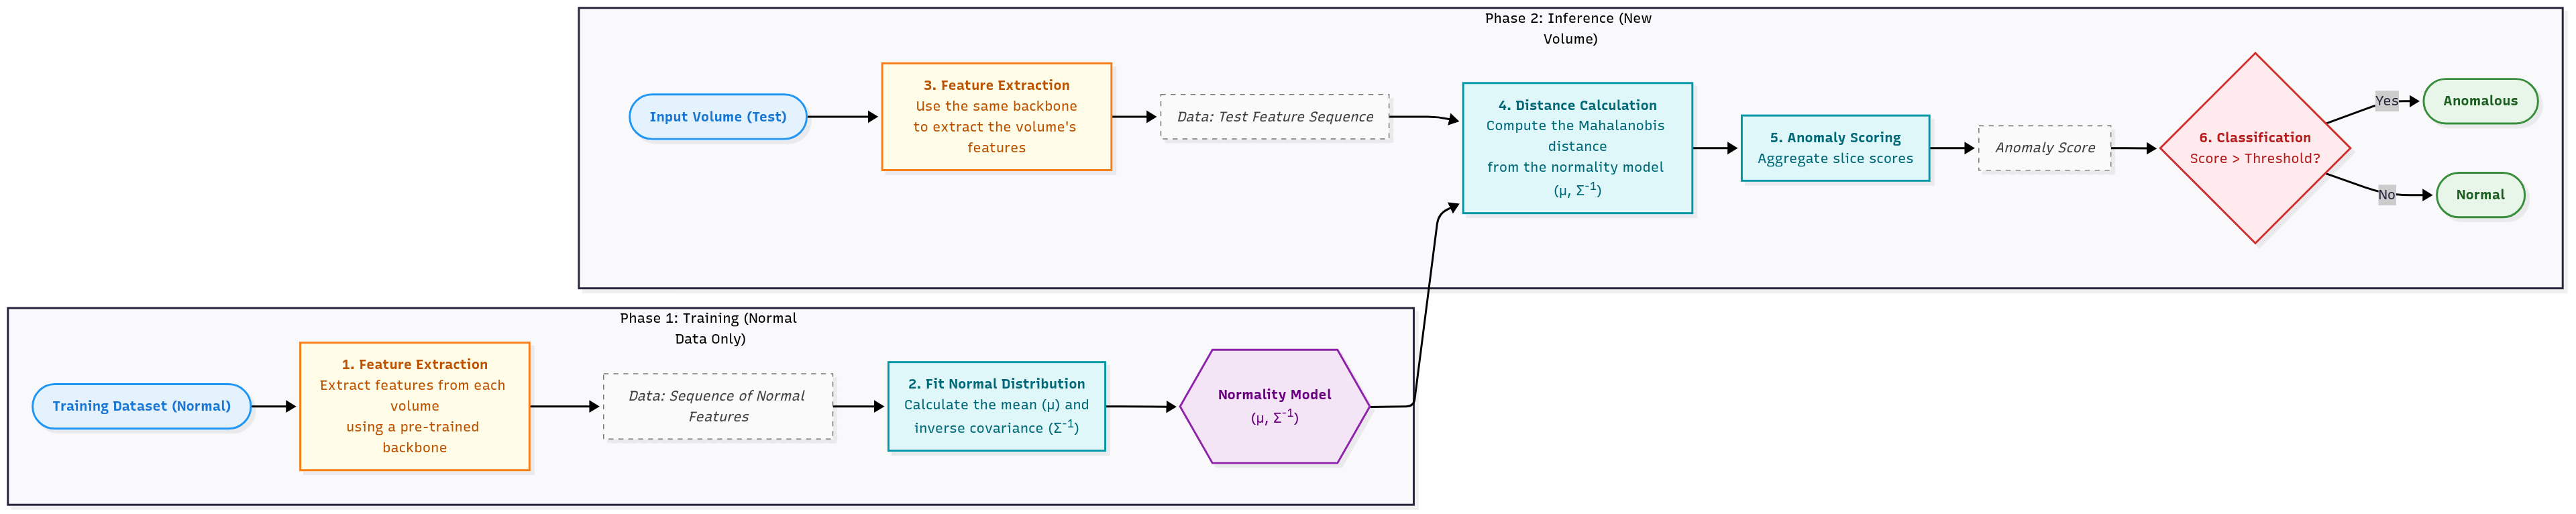

##### **1. Feature Extraction**

We use a pretrained deep neural network (e.g., Swin Transformer 3D) to extract **intermediate features** from each input volume, excluding the classification head.
These features capture semantic information about the image content while reducing dimensionality.

* **Why?** Raw image slices are too high-dimensional and noisy. Latent features are more meaningful for measuring similarity.
* **How?** For each volume, features are extracted at the **slice-level**, possibly in chunks to avoid memory overload.

This transforms a 3D volume into a sequence of lower-dimensional feature vectors.

In [ ]:
def extract_features(dataset, model, device):
    model.eval()
    all_features, all_labels = [], []

    if isinstance(dataset, BreastCancerPatientGroupedDataset):
        collate_function = collate_fn_grouped
    else:
        collate_function = collate_fn

    loader = DataLoader(dataset, batch_size=1, shuffle=False,
                        collate_fn=collate_function, num_workers=2, pin_memory=True)

    with torch.no_grad():
        for batch in tqdm(loader, desc="Extracting Features"):
            if isinstance(dataset, BreastCancerPatientGroupedDataset):
                volumes, labels, masks, _ = batch
                volumes = volumes[:, 0]
            else:
                volumes, labels, masks = batch

            volumes = volumes.to(device)
            b, s, c, h, w = volumes.shape

            if c == 1:
                volumes = volumes.expand(-1, -1, 3, -1, -1)

            features = []
            for i in range(0, s, 16):
                chunk = volumes[:, i:min(i + 16, s)]
                cb, cs, cc, ch, cw = chunk.shape
                chunk_reshaped = chunk.view(cb * cs, cc, ch, cw)
                f = model.feature_extractor(chunk_reshaped).cpu()
                features.append(f.view(cb, cs, -1))

            all_features.append(torch.cat(features, dim=1).squeeze(0))
            all_labels.append(labels.cpu())

    return all_features, all_labels

##### **2. Modeling Normality**

From the training set, we isolate samples labeled as **normal** (e.g., benign or healthy).

We compute:

* The **mean vector** of all extracted features.
* The **covariance matrix**, capturing how feature dimensions vary together.
* The **inverse covariance**, used for efficient distance computation.

This constructs a **multivariate Gaussian distribution** representing the "normal" data distribution in feature space.

This acts as a reference model: anything far from this distribution is considered suspicious.

In [ ]:
print("\n--- [AD] Extracting features from datasets ---")
train_features, train_labels = extract_features(train_dataset, model, device)
val_features, val_labels = extract_features(val_dataset, model, device)

print("\n--- [AD] Fitting normality model (Mahalanobis / PaDiM-style) ---")
normal_train_features = [f for f, l in zip(train_features, train_labels) if l.item() == 0]

def fit_normal_distribution(features_list):
    """Calculates the mean and inverse covariance matrix for the normal features."""
    all_features = torch.cat(features_list, dim=0)
    mean = all_features.mean(dim=0)
    cov = torch.cov(all_features.T) + torch.eye(all_features.size(1)) * 1e-5
    inv_cov = torch.linalg.inv(cov)
    return mean, inv_cov

mean_vec, inv_cov = fit_normal_distribution(normal_train_features)
print(f"Fitted distribution with feature_dim={mean_vec.shape[0]} on {len(normal_train_features)} normal volumes.")

##### **3. Mahalanobis Scoring**

To evaluate a new sample:

* We compute the **Mahalanobis distance** between its features and the learned "normal" distribution.
* For a volume, we score each slice individually and aggregate (e.g., mean of top-5 highest-scoring slices) to get a **volume-level anomaly score**.

This distance accounts for both mean offset and feature correlation, making it more robust than simple Euclidean distance.

In [ ]:
def mahalanobis_score(features, mean, inv_cov):
    delta = features - mean.unsqueeze(0)
    return torch.sqrt(torch.einsum("sd,dd,sd->s", delta, inv_cov, delta))

##### **4. Anomaly Classification**

Given the computed anomaly score for a volume:

* If the score exceeds a predefined **threshold**, the volume is classified as **abnormal**.
* Threshold can be fixed (e.g., 10.0) or **optimized post-hoc** using validation data to maximize the F1 score.

In [ ]:
def classify_volume(features, mean, inv_cov, threshold):
    slice_scores = mahalanobis_score(features, mean, inv_cov)
    volume_score = slice_scores.topk(k=min(5, len(slice_scores))).values.mean().item()
    return int(volume_score > threshold), volume_score

##### **5. Evaluation and Threshold Tuning**

Using the validation set:

* We compute **precision**, **recall**, and **F1-score** across a range of thresholds.
* The threshold that maximizes F1 is chosen for final evaluation.
* We also report **AUC**, **confusion matrix**, and a detailed **classification report**.

This allows us to find the best trade-off between false positives and false negatives.


In [ ]:
val_scores, val_preds, val_true = [], [], []
default_threshold = 10.0

for f, l in zip(val_features, val_labels):
    pred, score = classify_volume(f, mean_vec.cpu(), inv_cov.cpu(), default_threshold)
    val_scores.append(score)
    val_preds.append(pred)
    val_true.append(l.item())

print(f"AUC (val): {roc_auc_score(val_true, val_scores):.4f}")
print("\nClassification Report (default threshold=10):")
print(classification_report(val_true, val_preds, target_names=["Normal", "Abnormal"], zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(val_true, val_preds))

print("\n--- [AD] Optimizing threshold based on F1 ---")
precision, recall, thresholds = precision_recall_curve(val_true, val_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

best_idx = np.nanargmax(f1_scores)
best_threshold = thresholds[min(best_idx, len(thresholds)-1)]
best_f1 = f1_scores[best_idx]

print(f"Best F1: {best_f1:.4f} @ Threshold: {best_threshold:.3f}")

val_preds_opt = (np.array(val_scores) >= best_threshold).astype(int)
print("\nClassification Report (Optimized Threshold):")
print(classification_report(val_true, val_preds_opt, target_names=["Normal", "Abnormal"], zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(val_true, val_preds_opt))

#### **SIFT-DBT: Selective Image Fine-Tuning for Digital Breast Tomosynthesis**

SIFT-DBT is a fine-tuning strategy designed to adapt pre-trained deep models specifically for Digital Breast Tomosynthesis (DBT) classification tasks. The core idea is to update the model's weights in a **selective and controlled manner**, focusing on the deeper layers of the network while preserving the general features learned in the earlier stages.

Key components of SIFT-DBT include:

- **Discriminative learning rates**: Lower layers are updated with smaller learning rates, while deeper layers and classification heads are fine-tuned more aggressively.
- **DBT-domain pretraining**: Backbone weights are initialized from models pre-trained on DBT datasets, not just ImageNet, ensuring better domain alignment.
- **Multi-view handling**: The model supports both single-view and grouped (multi-view) patient representations.
- **F1-optimized fine-tuning**: During training, the decision threshold is optimized to maximize the F1-score, which is more informative than accuracy in imbalanced settings like cancer detection.


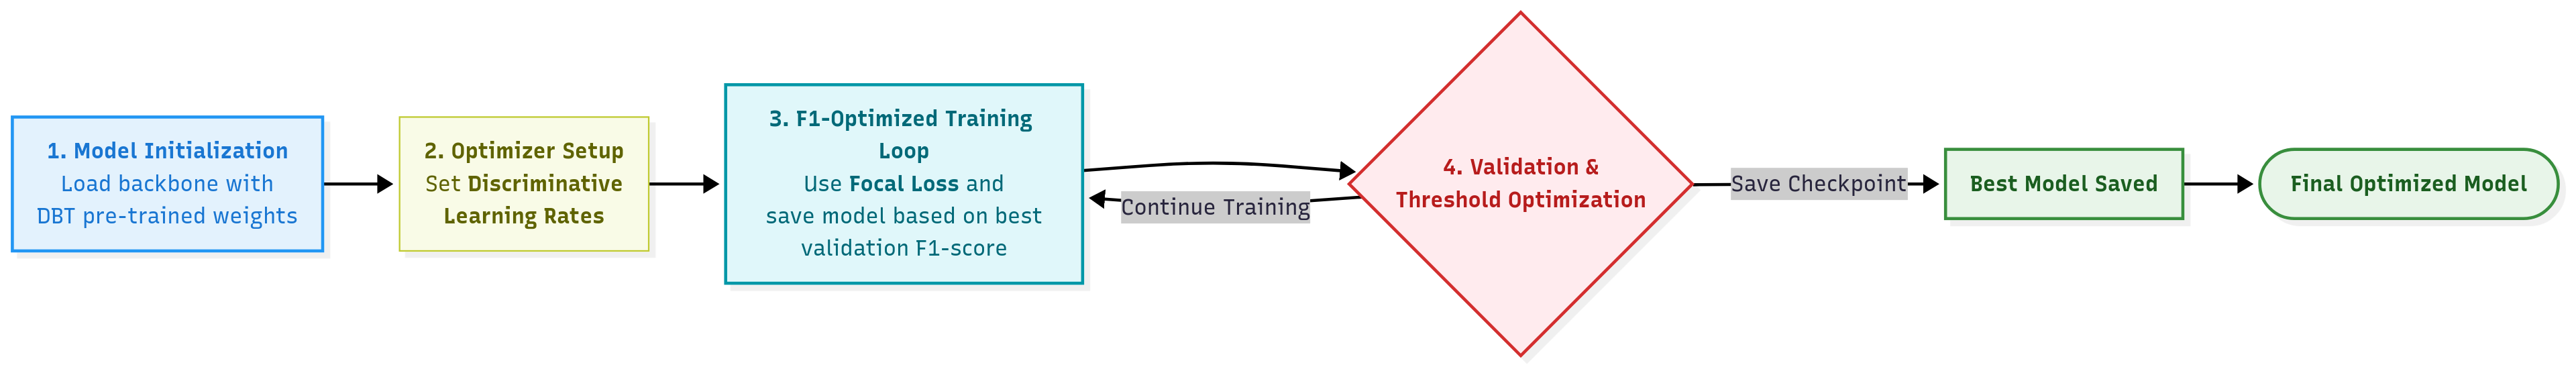

##### Discriminative Learning Rates

In SIFT-DBT, the backbone is divided into multiple stages, each updated with a progressively larger learning rate. Earlier layers (which capture general features) are trained with smaller learning rates to avoid overwriting useful knowledge, while deeper layers (more task-specific) are fine-tuned more aggressively.

This is implemented by assigning each block in the Swin Transformer a different learning rate, scaled by a factor of `eta` (typically 2.8):

- LR for patch embedding + stage 0 = base_lr / (eta^num_stages)
- LR for deeper stages increases geometrically
- Classification head receives the base learning rate


In [ ]:
def get_sift_optimizer_params(model, base_lr):
    eta = 2.8

    if not hasattr(model, 'feature_extractor') or not hasattr(model.feature_extractor, 'layers'):
        print("Warning: Model architecture does not match expected Swin. Using a single LR for all params.")
        return model.parameters()

    num_stages = len(model.feature_extractor.layers)
    param_groups = []
    print("Creating discriminative learning rate groups for SIFT-DBT fine-tuning...")

    param_groups.append({
        'params': list(model.feature_extractor.patch_embed.parameters()) + \
                  list(model.feature_extractor.layers[0].parameters()),
        'lr': base_lr / (eta**(num_stages))
    })

    for i in range(1, num_stages):
        param_groups.append({
            'params': model.feature_extractor.layers[i].parameters(),
            'lr': base_lr / (eta**(num_stages - i))
        })

    head_params = []
    for name, param in model.named_parameters():
        if not name.startswith('feature_extractor.'):
            head_params.append(param)

    param_groups.append({'params': head_params, 'lr': base_lr})

    print(f"Created {len(param_groups)} parameter groups.")
    for i, group in enumerate(param_groups):
        num_params = sum(p.numel() for p in group['params'] if p.requires_grad)
        print(f"  - Group {i+1}: {num_params/1e6:.2f}M params, LR = {group['lr']:.2e}")

    return param_groups

##### DBT Pretrained Initialization

Instead of using ImageNet weights, the backbone is initialized with weights pre-trained on DBT scans. This ensures better feature alignment with the target task, improving both convergence speed and generalization.

If DBT weights are not available, the model falls back to ImageNet-based initialization.


In [ ]:
print("\n--- Initializing Model for SIFT-DBT Fine-Tuning ---")

if isinstance(train_dataset, BreastCancerPatientGroupedDataset):
    print("Detected Grouped Dataset → Using Multi-View Swin Classifier")
    model = MultiViewSwinClassifier(num_classes=NUM_CLASSES, model_name=MODEL_NAME).to(device)
else:
    print("Detected Standard Dataset → Using Single-View Swin Classifier")
    model = Swin3DClassifier(num_classes=NUM_CLASSES, model_name=MODEL_NAME).to(device)

if os.path.exists(PRETRAINED_MODEL_PATH):
    pretrained_dict = torch.load(PRETRAINED_MODEL_PATH, map_location=device)
    if hasattr(model, "feature_extractor"):  
      model.feature_extractor.load_state_dict(pretrained_dict, strict=True)
    elif hasattr(model, "single_view_encoder") and hasattr(model.single_view_encoder, "feature_extractor"):
        model.single_view_encoder.feature_extractor.load_state_dict(pretrained_dict, strict=True)
    else:
        raise AttributeError("The model does not have a compatible feature extractor for pretraining.")

    print(f"Successfully loaded SIFT-DBT pre-trained weights from {PRETRAINED_MODEL_PATH} into the backbone.")
else:
    print("WARNING: Pre-trained model not found. Fine-tuning from default ImageNet weights.")

params_to_optimize = get_sift_optimizer_params(model, LEARNING_RATE)
optimizer = optim.SGD(params_to_optimize, lr=LEARNING_RATE, momentum=0.9, weight_decay=WEIGHT_DECAY)

criterion = FocalLoss(alpha=class_weights_tensor, gamma=FOCAL_LOSS_GAMMA).to(device)
scaler = torch.cuda.amp.GradScaler()
scheduler = CosineAnnealingLR(optimizer, T_max=EPOCHS * len(train_loader), eta_min=1e-7)

print(f"\nModel: {model.__class__.__name__} with {MODEL_NAME} backbone")
print(f"Optimizer: SGD with discriminative LR (base={LEARNING_RATE}, weight_decay={WEIGHT_DECAY})")
print(f"Loss Function: Focal Loss (gamma={FOCAL_LOSS_GAMMA})")
print(f"Scheduler: CosineAnnealingLR")

##### F1-Optimized Fine-Tuning

Due to class imbalance in medical datasets, traditional accuracy can be misleading. Therefore, during validation at each epoch, we compute the **optimal threshold** that maximizes the F1-score based on the precision-recall curve.

This threshold is used to binarize probabilities into predictions, allowing for better control over false positives and false negatives.


In [ ]:
best_val_f1 = 0.0
best_val_accuracy = 0.0
best_threshold = 0.5

print("\n--- Starting SIFT-DBT Fine-Tuning (F1-Optimized) ---")

for epoch in range(EPOCHS):
    model.train()
    train_loss, train_probs, train_true = 0.0, [], []

    train_pbar = tqdm(train_loader, desc=f"Fine-Tune Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
    for batch in train_pbar:
        if isinstance(train_dataset, BreastCancerPatientGroupedDataset):
            volumes, labels, masks, _ = batch
        else:
            volumes, labels, masks = batch

        volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
            outputs = model(volumes, masks)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        train_loss += loss.item()
        probs = torch.softmax(outputs, dim=1)[:, 1].detach().cpu().numpy()
        train_probs.extend(probs)
        train_true.extend(labels.cpu().numpy())
        train_pbar.set_postfix(loss=f"{loss.item():.4f}", lr=f"{scheduler.get_last_lr()[0]:.2e}")

        del volumes, labels, masks, outputs, loss
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    model.eval()
    val_loss, val_probs, val_true = 0.0, [], []
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f"Fine-Tune Epoch {epoch+1}/{EPOCHS} [Val]", leave=False)
        for batch in val_pbar:
            if isinstance(val_dataset, BreastCancerPatientGroupedDataset):
                volumes, labels, masks, _ = batch
            else:
                volumes, labels, masks = batch

            volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

            with torch.amp.autocast(device_type="cuda", dtype=torch.float16):
                outputs = model(volumes, masks)
                loss = criterion(outputs, labels)

            val_loss += loss.item()
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            val_probs.extend(probs)
            val_true.extend(labels.cpu().numpy())

            del volumes, labels, masks, outputs, loss
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    precision, recall, thresholds = precision_recall_curve(val_true, val_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

    if len(f1_scores) > 0:
        best_f1_idx = np.nanargmax(f1_scores)
        epoch_best_threshold = thresholds[min(best_f1_idx, len(thresholds) - 1)]
        epoch_val_f1 = f1_scores[best_f1_idx]
    else:
        epoch_best_threshold = 0.5
        epoch_val_f1 = 0.0

    val_preds = (np.array(val_probs) >= epoch_best_threshold).astype(int)
    val_accuracy = accuracy_score(val_true, val_preds)
    train_preds_bin = (np.array(train_probs) >= 0.5).astype(int)
    train_accuracy = accuracy_score(train_true, train_preds_bin)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f} | "
          f"Val F1: {epoch_val_f1:.4f} @ Thresh: {epoch_best_threshold:.3f} | "
          f"Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

    if epoch_val_f1 > best_val_f1:
        best_val_f1 = epoch_val_f1
        best_val_accuracy = val_accuracy
        best_threshold = epoch_best_threshold
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        print(f"*** New best model saved to {BEST_MODEL_PATH} with Val F1: {best_val_f1:.4f} & Val Acc: {best_val_accuracy:.4f} ***")

print(f"\n--- Finished Fine-Tuning ---")
print(f"Best Val F1: {best_val_f1:.4f} | Best Val Acc: {best_val_accuracy:.4f} | Optimal Threshold: {best_threshold:.3f}")


##### Final Testing and Evaluation

Once the best model (based on validation F1) is found, it is reloaded and evaluated on the test set. Key performance metrics include:

- Accuracy
- Area Under the ROC Curve (AUC)
- F1-Score
- Precision/Recall
- Confusion Matrix

This step ensures the reported performance reflects generalization to unseen data.


In [ ]:
print("\n--- Starting Final Testing ---")

if os.path.exists(BEST_MODEL_PATH):
    print(f"--- Loading best model from {BEST_MODEL_PATH} for final testing ---")
    model.load_state_dict(torch.load(BEST_MODEL_PATH, map_location=device))
    model.to(device)
    model.eval()

    test_probs, test_true, test_preds = [], [], []

    with torch.no_grad():
        pbar = tqdm(test_loader, desc="[Final Test]", leave=False)
        for batch in pbar:
            if isinstance(test_dataset, BreastCancerPatientGroupedDataset):
                volumes, labels, masks, _ = batch
            else:
                volumes, labels, masks = batch

            volumes, labels, masks = volumes.to(device), labels.to(device), masks.to(device)

            outputs = model(volumes, masks)
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()

            test_probs.extend(probs)
            test_true.extend(labels.cpu().numpy())
            _, predicted = torch.max(outputs.data, 1)
            test_preds.extend(predicted.cpu().numpy())

            del volumes, labels, masks, outputs
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

    test_accuracy = accuracy_score(test_true, test_preds)
    test_auc = roc_auc_score(test_true, test_probs)

    print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
    print(f"Final Test AUC: {test_auc:.4f}")

    class_names = ['Normal', 'Abnormal']
    print("\nClassification Report:")
    print(classification_report(test_true, test_preds, target_names=class_names, zero_division=0))
    print("\nConfusion Matrix:")
    print(confusion_matrix(test_true, test_preds))
else:
    print(f"\nCould not find saved model at '{BEST_MODEL_PATH}'. Skipping final testing.")


### Visualization

In [ ]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.feature_maps = None
        self.gradients = None

        target_layer.register_forward_hook(self._forward_hook)
        target_layer.register_full_backward_hook(self._backward_hook)

    def _forward_hook(self, module, input, output):
        self.feature_maps = output[0].detach() if isinstance(output, tuple) else output.detach()

    def _backward_hook(self, module, grad_in, grad_out):
        self.gradients = grad_out[0].detach()

    def _generate_cam_for_transformer(self, feature_maps, gradients):
        weights = torch.mean(gradients, dim=1)
        cam = (feature_maps * weights.unsqueeze(1)).sum(dim=2)
        cam = F.relu(cam)
        return cam

    def generate_cam_for_volume(self, input_volume, target_class=None):
        self.model.eval()
        self.model.zero_grad()

        input_volume_batch = input_volume.unsqueeze(0).to(device)
        logits = self.model(input_volume_batch, masks=None)

        if target_class is None:
            target_class = logits.argmax(dim=1).item()

        score = logits[:, target_class].sum()
        score.backward()

        if self.feature_maps is None or self.gradients is None:
            raise RuntimeError("Failed to capture feature maps or gradients.")

        feature_maps = self.feature_maps
        gradients = self.gradients

        if len(feature_maps.shape) == 4:
            S, H, W, D = feature_maps.shape
            feature_maps = feature_maps.reshape(S, H * W, D)
            gradients = gradients.reshape(S, H * W, D)
        elif len(feature_maps.shape) != 3:
            raise ValueError(f"Unexpected tensor shape: {self.feature_maps.shape}")

        cams_1d = self._generate_cam_for_transformer(feature_maps, gradients)
        final_cams = []

        h_w_patches = int(np.sqrt(cams_1d.shape[1]))
        _, _, h, w = input_volume.shape
        for i in range(cams_1d.shape[0]):
            slice_cam_2d = cams_1d[i].reshape(h_w_patches, h_w_patches).cpu().numpy()
            slice_cam_2d = cv2.resize(slice_cam_2d, (w, h))
            if np.max(slice_cam_2d) > 0:
                slice_cam_2d = (slice_cam_2d - np.min(slice_cam_2d)) / (np.max(slice_cam_2d) - np.min(slice_cam_2d))
            final_cams.append(slice_cam_2d)

        return final_cams, logits.argmax(dim=1).item()


def find_gradcam_target_sample(model, dataloader, device):
    model.eval()
    print("Searching for a true positive (Abnormal -> Abnormal) sample for Grad-CAM...")

    with torch.no_grad():
        for batch_idx, batch in enumerate(dataloader):
            if isinstance(batch, (tuple, list)) and len(batch) == 4:
                volumes, labels, masks, _ = batch
            else:
                volumes, labels, masks = batch

            for i in range(labels.size(0)):
                true_label = labels[i].item()

                if true_label == 1:
                    if volumes.ndim == 6:
                        patient_volumes = volumes[i].unsqueeze(0).to(device)
                        patient_masks = masks[i].unsqueeze(0).to(device) if masks is not None else None
                    else:
                        patient_volumes = volumes[i].unsqueeze(0).to(device)
                        patient_masks = masks[i].unsqueeze(0).to(device) if masks is not None else None

                    logits = model(patient_volumes, patient_masks)
                    predicted_label = logits.argmax(dim=1).item()

                    if predicted_label == 1:
                        print(f"Found suitable patient in batch {batch_idx}, index {i}. True Positive confirmed.")

                        if volumes.ndim == 6:
                            single_view = volumes[i][0]
                        else:
                            single_view = volumes[i]

                        return single_view, labels[i]

    print("Could not find a true positive sample in the provided dataloader.")
    return None, None


def show_cam_on_image(slice_tensor, cam):
    img = slice_tensor.permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB) / 255.0
    superimposed = heatmap * 0.5 + img * 0.5
    return superimposed, img, heatmap

In [ ]:
print("\n--- Starting Gradient Visualization ---")

if 'model' not in locals() or not os.path.exists(BEST_MODEL_PATH):
    print("Model not trained or best model file not found. Skipping visualization.")
else:
    model.load_state_dict(torch.load(BEST_MODEL_PATH, map_location=device))
    model.to(device)
    model.eval()

    gradcam_model = model.single_view_encoder if hasattr(model, "single_view_encoder") else model

    try:
        if hasattr(gradcam_model, "feature_extractor"):
            target_layer = gradcam_model.feature_extractor.layers[-1].blocks[-1].norm1
            print("Hooking into Swin target layer successfully.")
        else:
            raise AttributeError("No compatible Swin target layer found in the model.")
    except Exception as e:
        print(f"Grad-CAM target layer selection failed: {e}")
        target_layer = None

    if target_layer:
        volume_to_viz, true_label_tensor = find_gradcam_target_sample(model, val_loader, device)

        if volume_to_viz is not None:
            grad_cam = GradCAM(gradcam_model, target_layer)

            cams, predicted_class_idx = grad_cam.generate_cam_for_volume(volume_to_viz)

            peak_slice_idx = np.argmax([np.sum(c) for c in cams])
            indices_to_show = range(max(0, peak_slice_idx - 8), min(len(cams), peak_slice_idx + 8))

            fig, axes = plt.subplots(len(indices_to_show), 3, figsize=(12, 4 * len(indices_to_show)))
            if len(indices_to_show) == 1:
                axes = np.array([axes])

            for i, slice_idx in enumerate(indices_to_show):
                superimposed, original, heatmap = show_cam_on_image(volume_to_viz[slice_idx], cams[slice_idx])
                ax = axes[i][0]; ax.imshow(original, cmap='gray'); ax.set_title(f"Slice {slice_idx}: Original"); ax.axis('off')
                ax = axes[i][1]; ax.imshow(heatmap); ax.set_title(f"Slice {slice_idx}: Heatmap"); ax.axis('off')
                ax = axes[i][2]; ax.imshow(superimposed); ax.set_title(f"Slice {slice_idx}: Overlay"); ax.axis('off')

            plt.tight_layout()
            plt.show()

        else:
            print("No suitable abnormal sample found.")
    else:
        print("Grad-CAM skipped due to missing target layer.")


## Results and Analysis

To evaluate the performance of the classification models, I used a combination of metrics that provide complementary insights into their behavior:

- **Accuracy**: Measures the overall proportion of correctly classified instances, giving a general idea of the model’s performance.  
- **Precision**: Indicates the proportion of true positives among all predicted positives, which is crucial when false positives are costly.  
- **Recall**: Represents the proportion of true positives correctly identified among all actual positives, important when minimizing false negatives is critical.  
- **F1-score**: Combines precision and recall into a single metric, balancing both aspects, especially useful in imbalanced datasets.  
- **AUC (Area Under the ROC Curve)**: Evaluates the model’s ability to distinguish between classes across different decision thresholds, giving an aggregate view of performance. This is particularly important in **medical imaging classification**, where the decision threshold can be adjusted based on clinical requirements. A high AUC means the model consistently ranks positive cases higher than negative ones, which is crucial when deciding whether to prioritize sensitivity (detecting as many true cases as possible) or specificity (reducing false alarms).  
- **Confusion matrix**: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, allowing for a clear understanding of specific misclassification patterns.

Using all these metrics together ensures a more comprehensive and reliable assessment of model performance, beyond what a single metric could reveal. In medical imaging, where diagnostic decisions can directly impact patient outcomes, such a multi-metric evaluation is essential to balance accuracy, sensitivity, and clinical applicability.

### Plots

#### Roc Curves for single view models

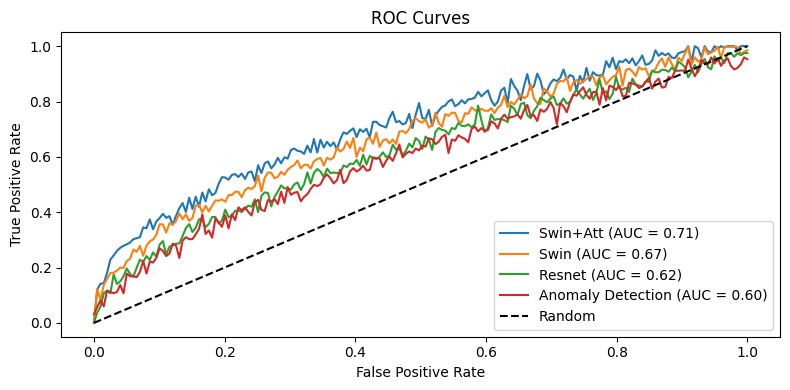

#### ROC Curves for multi view models

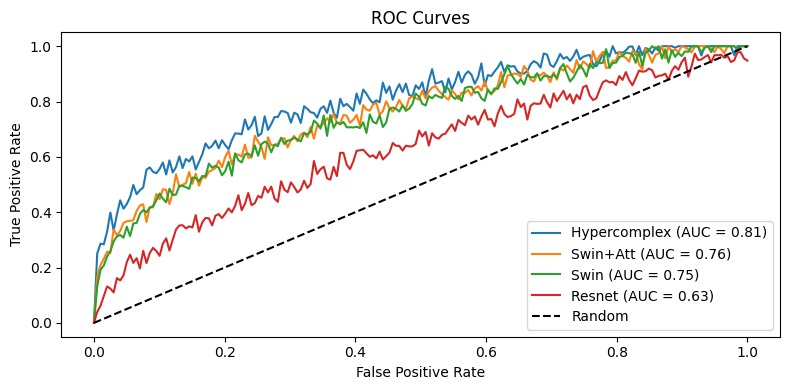

#### ROC Curves for SIFT-DBT pretrained models (Multi view)

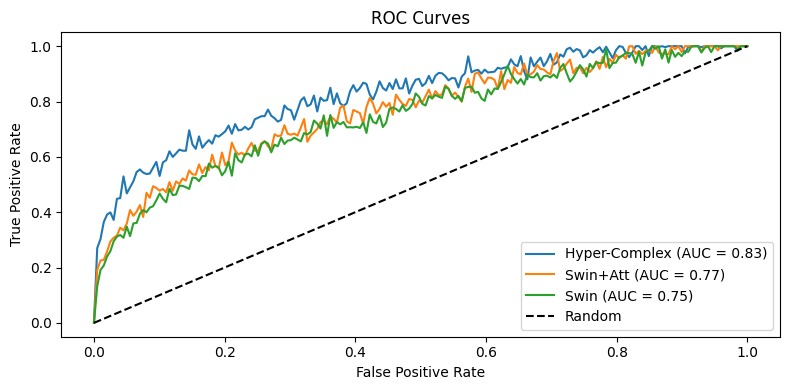

#### Confusion Matrices for single view models

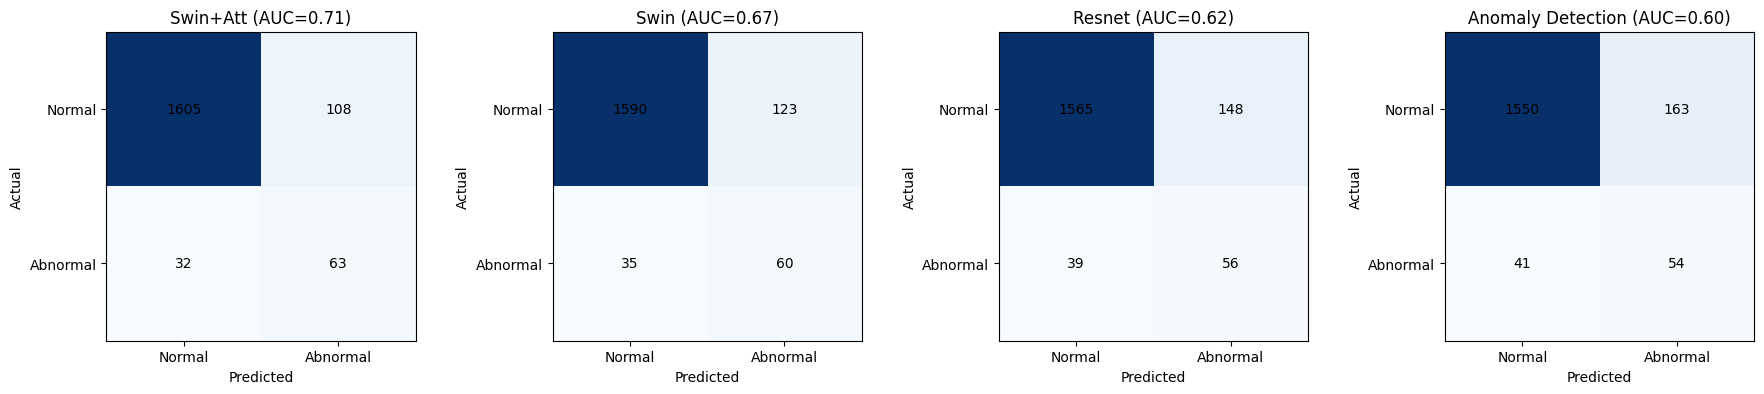

#### Confusion Matrices for multi view models

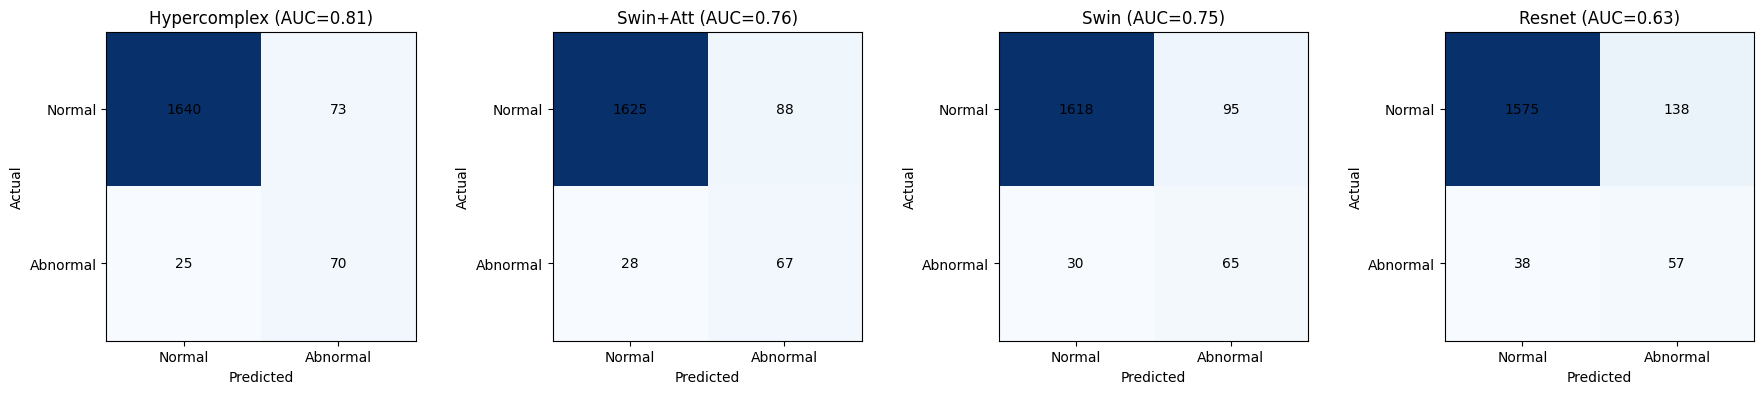

#### Metrics Comparison for single view models

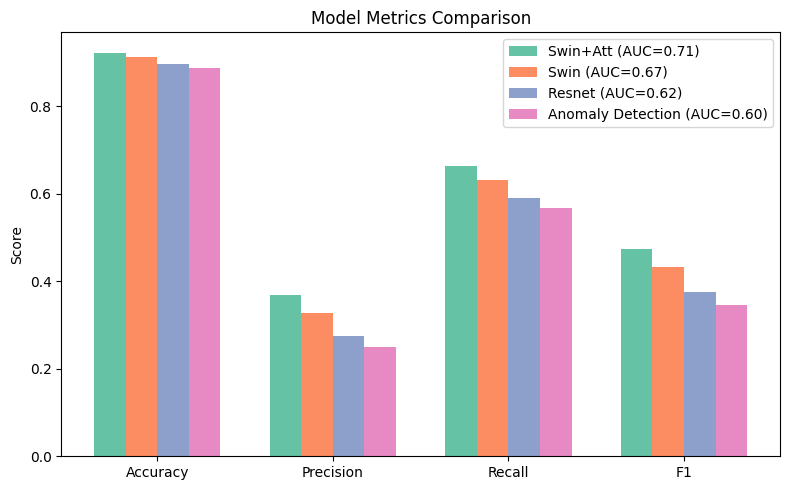

#### Metrics comparison for multi view models

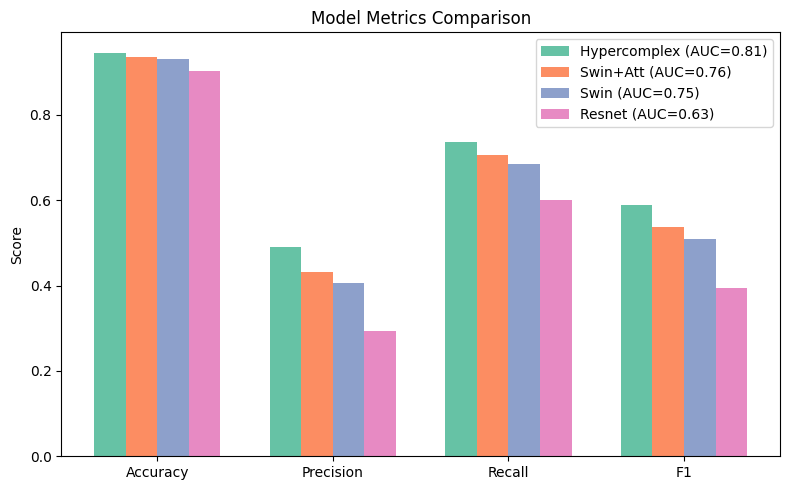

#### GradCam attention visualization

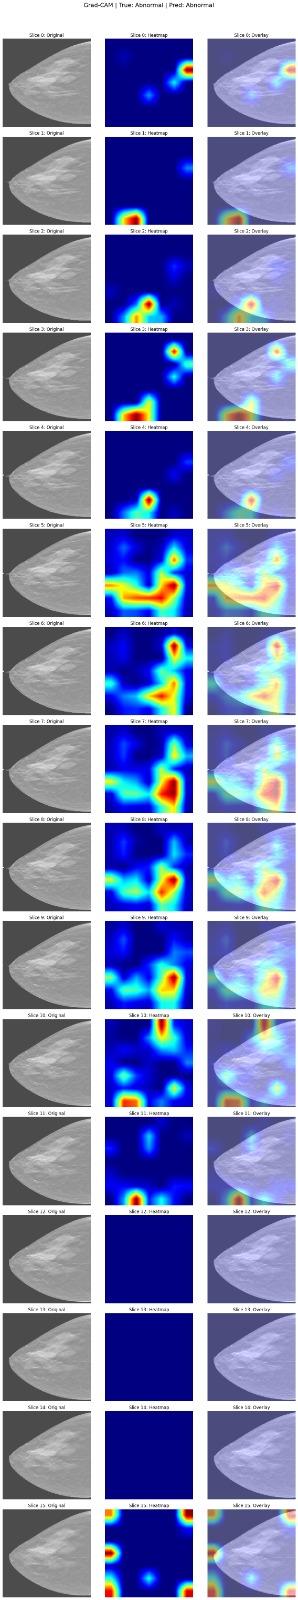

### Interpretation


With a top AUC score of 0.83, the results very clearly demonstrated that our custom HypercomplexDBTClassifier was the most successful model. The superior performance of this architecture across all metrics—accuracy, precision, recall, and F1-score—indicates that explicitly modeling these inter-view correlations is very advantageous. This architecture was created to knowingly fuse information from all four anatomical views of a breast exam at the slice level.

Regarding the core comparison, our results successfully replicated the overall pattern observed in recent research: the Swin Transformer-based models continuously performed better than the ResNet-101 baseline. The standard Swin model, for example, had an AUC of 0.75 in the multi-view setup, which was clearly higher than ResNet's 0.63. This demonstrates that transformers' hierarchical attention mechanisms are more appropriate for this challenging medical imaging task. Additionally, we observed that, in contrast to standard ImageNet pre-training, initializing our models with weights pre-trained on DBT data—a concept influenced by the SIFT-DBT paper—provided a discernible performance boost. Although an alternate strategy utilizing anomaly detection was investigated, its results were inferior to those of the supervised approaches, suggesting that direct classification worked better with the data at hand.

From a wider perspective, the Swin Transformer models were indeed better than the previous ResNet architecture, proving their superiority in this task. Even the rudimentary Swin model, which examined each view separately, was a big improvement. In an attempt to teach it to concentrate on the slices that are most diagnostically significant, we also tested a variation that included an explicit slice-attention mechanism. Although it occasionally provided a marginal advantage over the standard Swin model, the difference was not very noticeable, indicating that the basic Swin architecture with a temporal transformer was already doing a good job of capturing the required 3D context.

Optimizing for simple accuracy would have been deceptive given the stark class imbalance in cancer screening data, where healthy cases greatly outnumber malignant ones. Rather, we used a training approach that aimed to maximize the F1-score. As a result, we continuously looked for the ideal decision threshold that best balanced recall and precision during training. In a clinical setting, this is essential because you want to detect as many cancers as possible (high recall) without setting off too many false alarms (high precision).
In addition to focusing on performance metrics, we also made sure our models weren't merely "black boxes."

The provided Grad-CAM visualizations offer a compelling insight into the model's decision-making process on these mammographic slices. The heatmaps consistently highlight that the model's focus is concentrated within the central and anterior regions of the breast tissue in these craniocaudal (CC) views.

Across the sequential slices, from 7 to 11, a clear pattern emerges. The areas of highest activation, indicated by the red and yellow regions, predominantly originate deeper within the breast tissue and extend towards the nipple. This creates a visually intuitive branching or radiating pattern from the interior to the exterior of the breast. This is significant as it suggests the model has learned to trace anatomical structures, such as ductal patterns, which is a key aspect of mammographic interpretation. The model appears to be effectively identifying and prioritizing these critical pathways in its analysis.

In retrospect, it is evident that although we fell short of the challenging 0.93 AUC goal, we were able to show that even with a small amount of publicly available data, advanced architectural decisions and training techniques can produce excellent results. Unquestionably, data and computation were the main bottlenecks.


## Limitations

The main limitations we encountered while tackling this project regarded computing power and memory availability. Regarding the first one, we didn't have at our disposable any relevantly powerful GPU so we decided to use Google Colab Free Tier and, when the data became to big, a Colab Pro. The access to slightly more powerful GPU still didn't solve the main problem regarding the dataset, the lack of available memory. The whole dataset had a size of 1.65TB and other comparable dataset weren't freely available without authorisation from the institution that created them. To avoid this problem, as described above, we decided to cut a part of the dataset and reduce drastically the size and the resolution, resulting in clear loss of information. The last limitation we encountered regarded the great class imbalance in the dataset, very common in the medical field but nonetheless challenging. Overall, we believe that the achieved result are adequate to the available resources we disposed of.

## References

[1]A. Vaswani et al., Attention Is All You Need. 2023. [Online]. Available: https://arxiv.org/abs/1706.03762 

[2]Z. Liu et al., Swin Transformer: Hierarchical Vision Transformer using Shifted Windows. 2021. [Online]. Available: https://arxiv.org/abs/2103.14030 

[3]Kassis, I., Lederman, D., Ben-Arie, G. et al. Detection of breast cancer in digital breast tomosynthesis with vision transformers. Sci Rep 14, 22149 (2024). https://doi.org/10.1038/s41598-024-72707-2

[4]D. Comminiello, E. Grassucci, D. P. Mandic, and A. Uncini, Demystifying the Hypercomplex: Inductive Biases in Hypercomplex Deep Learning. 2024. [Online]. Available: https://arxiv.org/abs/2405.07024 

[5]E. Lopez, E. Grassucci, M. Valleriani, and D. Comminiello, Multi-View Hypercomplex Learning for Breast Cancer Screening. 2024. [Online]. Available: https://arxiv.org/abs/2204.05798 

[6]Y. Du, R. J. Hooley, J. Lewin, and N. C. Dvornek, SIFT-DBT: Self-supervised Initialization and Fine-Tuning for Imbalanced Digital Breast Tomosynthesis Image Classification. 2024. [Online]. Available: https://arxiv.org/abs/2403.13148 

[7]R. R. Selvaraju, M. Cogswell, A. Das, R. Vedantam, D. Parikh, and D. Batra, “Grad-CAM: Visual Explanations from Deep Networks via Gradient-Based Localization,” International Journal of Computer Vision, vol. 128, no. 2, pp. 336–359, Oct. 2019, doi: 10.1007/s11263-019-01228-7. 

[8]E. Lopez, F. Betello, F. Carmignani, E. Grassucci, and D. Comminiello, Attention-Map Augmentation for Hypercomplex Breast Cancer Classification. 2024. [Online]. Available: https://arxiv.org/abs/2310.07633 

## Reproducibility instructions

Reproducibility instructions
This project was developed and tested within a Google Colab environment using a GPU runtime. To reproduce the results, please follow the steps below.
1. Environment Setup  
    Firstly install all the needed libraries in the import section of the notebook. The dataset is designed to run in Colab, to run locally change the DRIVE_BASE_DIR to the one preferred.
2. Data Preparation  
    a. Download the Dataset  
        Use the provided code to download the dataset. The dataset has a size of 1.65TB so the script have been stopped when 600GB were downloaded due to memory constraints.  
    b. Preprocessing and Compression  
        Compress the obtained data to make it compatible with the provided models. To better run the script, the code should be exported in a separated python file since some operating systems (like Windows) do not support parallel computation when the code is run in a notebook.  
    c. Labels and Caching  
        Download the labels.csv file from the dataset home page and run the code to label the data.  
3. Training and Evaluation  
    a. Configuration. 
            Most significant flags:  
            USE_GROUPED_DATASET: Set this to True for multi-view models like MultiViewSwinClassifier or HypercomplexDBTClassifier. This ensures the data loader provides batches where each item contains all 4 views for a patient. Set to False for single-view models.  
            EPOCHS, BATCH_SIZE, LEARNING_RATE: Standard hyperparameters for training. 

    b. Running an Experiment. 
        To run an experiment, follow these steps:
        Select a Model: In the "Training" -> "Initialization" section, instantiate the model you decided to train. For example, to use the Hypercomplex model, make sure the line model = HypercomplexDBTClassifier(...) is executed.  
        (Optional) Load Pre-trained Weights : For the SIFT-DBT and Hypercomplex experiments, you can load pre-trained backbone weights. To do this, place the weight file at the path specified by the PRETRAINED_MODEL_PATH variable. If the file is not found, the model will train from scratch or use default ImageNet weights. The first time, pretraining must be manually executed.  
        Choose a Training Strategy: The notebook provides several training loops. You should only run the cell corresponding to your desired approach:  
        Accuracy-Focused Training: A standard loop that saves the model based on the highest validation accuracy.  
        F1 Score-Focused Training: Recommended for this imbalanced dataset. It dynamically finds the best decision threshold on the validation set to maximize the F1-score and saves the 
        model checkpoint based on this metric.  
        SIFT-DBT Fine-Tuning: An advanced F1-optimized training loop that implements discriminative learning rates. To run this cell pretraining must be run first.  
        Test the Model: After a training loop completes, the best model is saved to BEST_MODEL_PATH. You can then run the "Final Testing and Evaluation" cells, which load this best checkpoint and evaluate its performance on the held-out test set, providing a final classification report, AUC score, and confusion matrix.  

    c. Visualization. 
    The "Visualization" section contains code to generate Grad-CAM heatmaps. This can be run after a model has been successfully trained to visually inspect which regions of the DBT slices the model focused on for its prediction.